# 전국 시도단위 자산평가 데이터
> 본 데이터는 KCB가 각 금융사들로부터 매일 수집하는 최신 금융 데이터를 공간 단위로 재가공해 월별로 제공하고 있습니다.
- KDX 한국데이터거래소 https://kdx.kr/main 접속 후 로그인
- `전국시도단위 자산평가` 검색
- `2021년 1월`부터 데이터 다운로드

<br/>
<br/>
<br/>
<br/>

## 모듈 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

<br>
<br>
<br>
<br>

## 데이터셋 로드

In [106]:
# 월 별 파일들을 데이터프레임으로 읽어서 dfs에 추가하세요.
dfs = []
filenames = list(range(202101, 202113)) + list(range(202201, 202205)) + [202206,202208,202211,202301,202302]
print(filenames)
path = 'dataset/자산평가/'
# 월 별 데이터 읽기
for filename in filenames :
    print(path + str(filename) + '.csv')
    dfs.append(pd.read_csv(path + str(filename) + '.csv',encoding='utf-8'))
    
len(dfs)

[202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204, 202206, 202208, 202211, 202301, 202302]
dataset/자산평가/202101.csv
dataset/자산평가/202102.csv
dataset/자산평가/202103.csv
dataset/자산평가/202104.csv
dataset/자산평가/202105.csv
dataset/자산평가/202106.csv
dataset/자산평가/202107.csv
dataset/자산평가/202108.csv
dataset/자산평가/202109.csv
dataset/자산평가/202110.csv
dataset/자산평가/202111.csv
dataset/자산평가/202112.csv
dataset/자산평가/202201.csv
dataset/자산평가/202202.csv
dataset/자산평가/202203.csv
dataset/자산평가/202204.csv
dataset/자산평가/202206.csv
dataset/자산평가/202208.csv
dataset/자산평가/202211.csv
dataset/자산평가/202301.csv
dataset/자산평가/202302.csv


21

In [105]:
#!pip install chardet /
import chardet

with open('dataset/자산평가/202302.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


In [3]:
# dfs의 모든 데이터프레임을 행 방향으로 연결하세요.
df = pd.concat(dfs)
df

,STD_YM,BLCK_SP_CD,CTPV_CD,CTPV_NM,TOT_ASST_AMT,NET_ASST_AMT,ONW_HOUS_RATIO,PLU_HOUS_RATIO,APT_RES_RATIO
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,1,28,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65
...,...,...,...,...,...,...,...,...,...
12,202204,1,45,전라북도,13676,12642,0.21,0.04,0.50
13,202204,1,46,전라남도,12304,11334,0.21,0.05,0.41
14,202204,1,47,경상북도,12871,11879,0.22,0.05,0.45
15,202204,1,48,경상남도,15790,14336,0.22,0.05,0.53


In [4]:
# 컬럼 명을 아래 순서대로 변경하세요.
# '기준년월', '블록구분코드', '시도코드', '시도명', '월평균총자산평가금액', '월평균순자산평가금액', '자가거주비율', '다주택자수비율', '아파트거주비율'
df.columns = ['기준년월', '블록구분코드', '시도코드', '시도명', '월평균총자산평가금액', '월평균순자산평가금액', '자가거주비율', '다주택자수비율', '아파트거주비율']
df

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,1,28,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65
...,...,...,...,...,...,...,...,...,...
12,202204,1,45,전라북도,13676,12642,0.21,0.04,0.50
13,202204,1,46,전라남도,12304,11334,0.21,0.05,0.41
14,202204,1,47,경상북도,12871,11879,0.22,0.05,0.45
15,202204,1,48,경상남도,15790,14336,0.22,0.05,0.53


### 컬럼설명
- 월평균 총자산 평가금액(만원) : 해당지역 고객들이 보유한 주택의 총자산 평균평가금액
- 월평균 순자산 평가금액(만원) : 해당지역 고객들이 보유한 주택의 총자산 평균평가금액에서 대출(주택담보대출, 전세자금대출 등)을 제외한 금액
- 자가거주 비율 : 해당지역 고객군의 자가주택 거주 비율
- 다주택자수 비율 : 해당지역 고객군의 다주택자수(보유주택 2채 이상) 비율
- 아파트 거주 비율 : 해당지역 고객군의 아파트 거주 비율

In [5]:
# 데이터프레임을 '자산평가.csv' 파일로 저장하세요.
df.to_csv(path + '자산평가.csv', index = False)
pd.read_csv(path + '자산평가.csv').head()

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,1,28,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 데이터탐색

In [6]:
# 데이터프레임의 상위 5개 행을 조회하세요.
df.head()

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,1,28,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65


In [7]:
# 데이터프레임의 기본 정보를 출력하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 16
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년월        272 non-null    int64  
 1   블록구분코드      272 non-null    int64  
 2   시도코드        272 non-null    int64  
 3   시도명         272 non-null    object 
 4   월평균총자산평가금액  272 non-null    int64  
 5   월평균순자산평가금액  272 non-null    int64  
 6   자가거주비율      272 non-null    float64
 7   다주택자수비율     272 non-null    float64
 8   아파트거주비율     272 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 21.2+ KB


In [8]:
# 범주형 컬럼명을 cat_val 에 저장하세요. 
# 연속형 컬럼명을 con_val에 저장하세요. 
cat_val = ['기준년월','시도명']
con_val = ['월평균총자산평가금액' ,'월평균순자산평가금액', '자가거주비율', '다주택자수비율', '아파트거주비율']

print(f'cat_val : {cat_val}')
print(f'con_val : {con_val}')

cat_val : ['기준년월', '시도명']
con_val : ['월평균총자산평가금액', '월평균순자산평가금액', '자가거주비율', '다주택자수비율', '아파트거주비율']


In [9]:
# 데이터프레임의 모양(행과 열의 개수)을 구하세요.
df.shape

(272, 9)

In [10]:
# 각 열 별 결측치 개수를 구하세요.
df.isna().sum()

기준년월          0
블록구분코드        0
시도코드          0
시도명           0
월평균총자산평가금액    0
월평균순자산평가금액    0
자가거주비율        0
다주택자수비율       0
아파트거주비율       0
dtype: int64

In [11]:
# "시도명" 열의 고윳값을 구하세요.
df['시도명'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [12]:
df['시도명'].value_counts()

시도명
서울특별시      16
강원도        16
경상남도       16
경상북도       16
전라남도       16
전라북도       16
충청남도       16
충청북도       16
경기도        16
부산광역시      16
세종특별자치시    16
울산광역시      16
대전광역시      16
광주광역시      16
인천광역시      16
대구광역시      16
제주특별자치도    16
Name: count, dtype: int64

In [13]:
df['기준년월'].value_counts()

기준년월
202101    17
202102    17
202103    17
202104    17
202105    17
202106    17
202107    17
202108    17
202109    17
202110    17
202111    17
202112    17
202201    17
202202    17
202203    17
202204    17
Name: count, dtype: int64

In [14]:
# 기본 통계 정보를 조회하세요.
df[con_val].describe()

,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
count,272.000000,272.000000,272.000000,272.000000,272.000000
mean,20258.977941,18698.900735,0.201213,0.047610,0.532721
std,8053.827235,7668.842174,0.019731,0.006471,0.103214
min,11181.000000,10322.000000,0.150000,0.040000,0.270000
25%,13636.250000,12466.500000,0.190000,0.040000,0.470000
50%,20083.500000,18358.500000,0.210000,0.050000,0.520000
75%,23114.250000,21461.500000,0.210000,0.050000,0.600000
max,47067.000000,44908.000000,0.230000,0.060000,0.750000


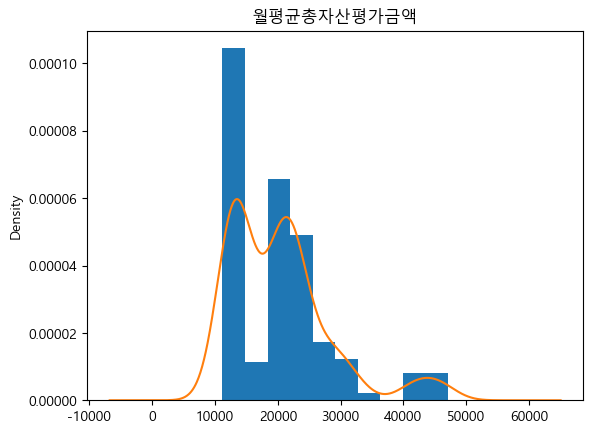

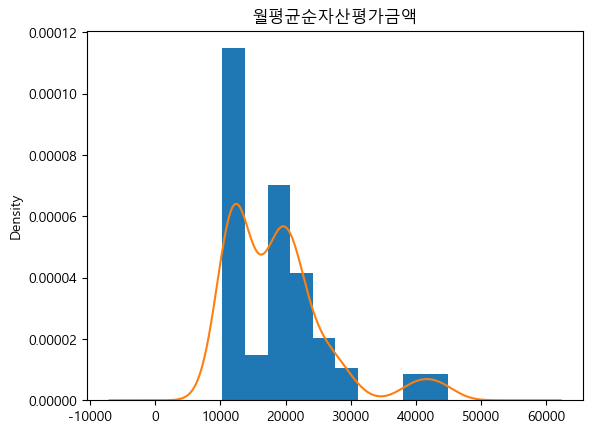

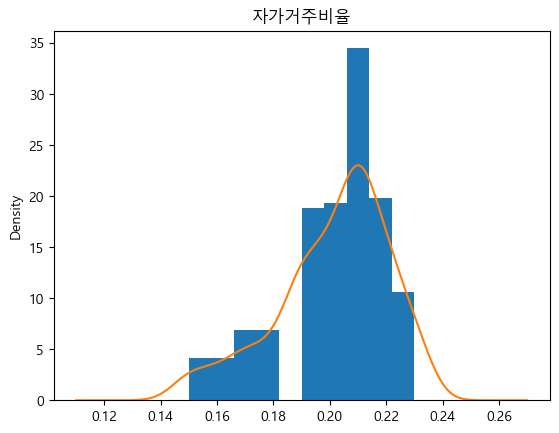

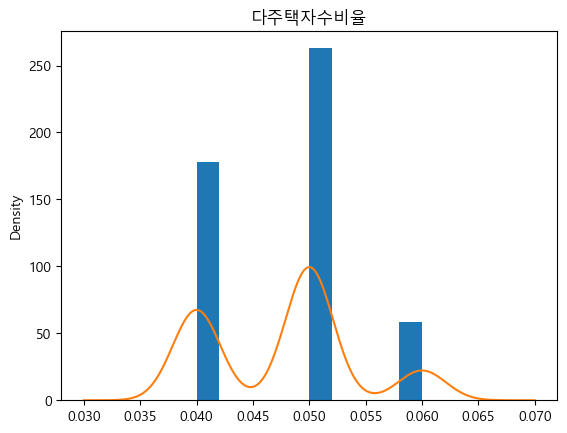

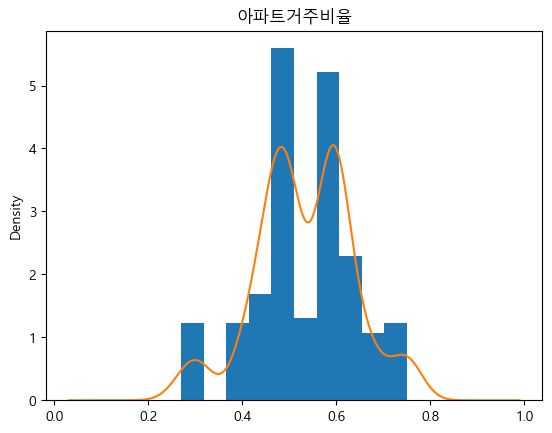

In [15]:
# 연속형인 컬럼에 대해서 히스토그램과 kde 그래프를 아래와 같이 출력하세요. 

for c in con_val: 
    df[c].hist(density=True)
    df[c].plot.kde()
    plt.title(c)
    plt.show()

<Axes: >

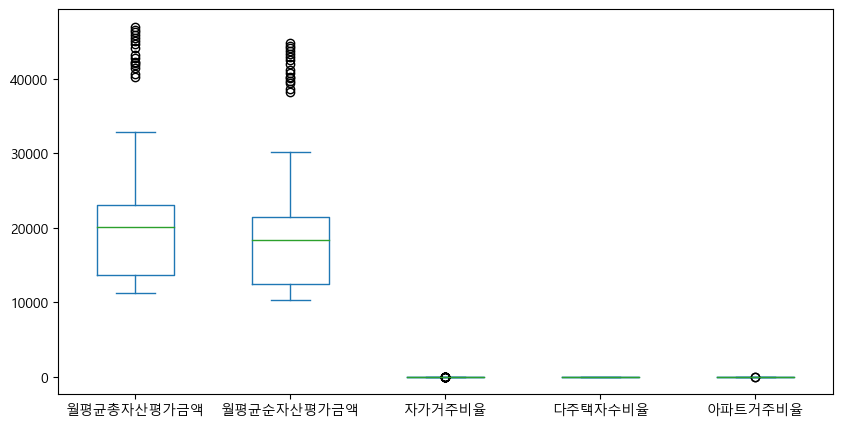

In [16]:
# 연속형 컬럼들에 대한 막대 그래프를 그려보세요. 
df[con_val].plot.box(figsize=(10,5))

In [17]:
# 연속형 자료들의 평균, 모분산, 표본분산을 소수점 2째자리까지 출력하세요. 
# 출력시 display함수를 사용하세요. 

for c in con_val: 
    display(df[c].agg({'평균':'mean', '모분산':(lambda x:x.var(ddof=0)), '표본분산':'var'}).round(2))


평균         20258.98
모분산     64625662.06
표본분산    64864133.14
Name: 월평균총자산평가금액, dtype: float64

평균         18698.90
모분산     58594922.87
표본분산    58811140.30
Name: 월평균순자산평가금액, dtype: float64

평균      0.2
모분산     0.0
표본분산    0.0
Name: 자가거주비율, dtype: float64

평균      0.05
모분산     0.00
표본분산    0.00
Name: 다주택자수비율, dtype: float64

평균      0.53
모분산     0.01
표본분산    0.01
Name: 아파트거주비율, dtype: float64

In [18]:
# 중앙값, 최소, 최대, 범위(최대~ 최소), IQR 를 출력하세요. 

for c in con_val:
    display(df[c].agg(중앙값=('median'),
                            최댓값=('max'),
                            최솟값=('min'),
                            범위=(lambda x: x.max() - x.min()),
                            IQR=(lambda x: x.quantile(.75) - x.quantile(.25))))

중앙값    20083.5
최댓값    47067.0
최솟값    11181.0
범위     35886.0
IQR     9478.0
Name: 월평균총자산평가금액, dtype: float64

중앙값    18358.5
최댓값    44908.0
최솟값    10322.0
범위     34586.0
IQR     8995.0
Name: 월평균순자산평가금액, dtype: float64

중앙값    0.21
최댓값    0.23
최솟값    0.15
범위     0.08
IQR    0.02
Name: 자가거주비율, dtype: float64

중앙값    0.05
최댓값    0.06
최솟값    0.04
범위     0.02
IQR    0.01
Name: 다주택자수비율, dtype: float64

중앙값    0.52
최댓값    0.75
최솟값    0.27
범위     0.48
IQR    0.13
Name: 아파트거주비율, dtype: float64

##### 이상치탐지

In [19]:
# IQR 방식을 이용하여 월평균총자산평가금액에 이상치(outlier)가 있는지 확인하세요. 
Q1 = df['월평균총자산평가금액'].quantile(.25)
Q3 = df['월평균총자산평가금액'].quantile(.75)
IQR = Q3-Q1
tukey_max = Q3 + 1.5*IQR
tukey_min = Q1 - 1.5*IQR

df[(df['월평균총자산평가금액'] > tukey_max) | (df['월평균총자산평가금액'] < tukey_min)]

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
0,202102,1,11,서울특별시,40640,38653,0.15,0.04,0.46
0,202103,1,11,서울특별시,41492,39476,0.15,0.04,0.47
0,202104,1,11,서울특별시,41828,39792,0.15,0.04,0.47
0,202105,1,11,서울특별시,42134,40088,0.15,0.04,0.47
0,202106,1,11,서울특별시,42317,40258,0.15,0.04,0.48
0,202107,1,11,서울특별시,42835,40763,0.15,0.04,0.48
0,202108,1,11,서울특별시,43304,41213,0.15,0.04,0.48
0,202109,1,11,서울특별시,44166,42053,0.16,0.04,0.48
0,202110,1,11,서울특별시,44682,42556,0.16,0.04,0.48


In [20]:
# IQR 방식을 이용하여 월평균총자산평가금액에 이상치(outlier)가 있는지 확인하세요. 
Q1 = df['월평균순자산평가금액'].quantile(.25)
Q3 = df['월평균순자산평가금액'].quantile(.75)
IQR = Q3-Q1
tukey_max = Q3 + 1.5*IQR
tukey_min = Q1 - 1.5*IQR

df[(df['월평균순자산평가금액'] > tukey_max) | (df['월평균순자산평가금액'] < tukey_min)]

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
0,202102,1,11,서울특별시,40640,38653,0.15,0.04,0.46
0,202103,1,11,서울특별시,41492,39476,0.15,0.04,0.47
0,202104,1,11,서울특별시,41828,39792,0.15,0.04,0.47
0,202105,1,11,서울특별시,42134,40088,0.15,0.04,0.47
0,202106,1,11,서울특별시,42317,40258,0.15,0.04,0.48
0,202107,1,11,서울특별시,42835,40763,0.15,0.04,0.48
0,202108,1,11,서울특별시,43304,41213,0.15,0.04,0.48
0,202109,1,11,서울특별시,44166,42053,0.16,0.04,0.48
0,202110,1,11,서울특별시,44682,42556,0.16,0.04,0.48


In [21]:
# IQR 방식을 이용하여 '자가거주비율' 에 이상치(outlier)가 있는지 확인하세요. 
Q1 = df['자가거주비율'].quantile(.25)
Q3 = df['자가거주비율'].quantile(.75)
IQR = Q3-Q1
tukey_max = Q3 + 1.5*IQR
tukey_min = Q1 - 1.5*IQR

df[(df['자가거주비율'] > tukey_max) | (df['자가거주비율'] < tukey_min)]

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
7,202101,1,36,세종특별자치시,27572,24909,0.15,0.06,0.72
0,202102,1,11,서울특별시,40640,38653,0.15,0.04,0.46
7,202102,1,36,세종특별자치시,27599,24997,0.16,0.06,0.72
0,202103,1,11,서울특별시,41492,39476,0.15,0.04,0.47
0,202104,1,11,서울특별시,41828,39792,0.15,0.04,0.47
0,202105,1,11,서울특별시,42134,40088,0.15,0.04,0.47
0,202106,1,11,서울특별시,42317,40258,0.15,0.04,0.48
0,202107,1,11,서울특별시,42835,40763,0.15,0.04,0.48
0,202108,1,11,서울특별시,43304,41213,0.15,0.04,0.48


In [22]:

# IQR 방식을 이용하여 '다주택자수비율' 에 이상치(outlier)가 있는지 확인하세요. 
Q1 = df['다주택자수비율'].quantile(.25)
Q3 = df['다주택자수비율'].quantile(.75)
IQR = Q3-Q1
tukey_max = Q3 + 1.5*IQR
tukey_min = Q1 - 1.5*IQR

df[(df['다주택자수비율'] > tukey_max) | (df['다주택자수비율'] < tukey_min)]

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율


In [23]:

# IQR 방식을 이용하여 '아파트거주비율' 에 이상치(outlier)가 있는지 확인하세요. 
Q1 = df['아파트거주비율'].quantile(.25)
Q3 = df['아파트거주비율'].quantile(.75)
IQR = Q3-Q1
tukey_max = Q3 + 1.5*IQR
tukey_min = Q1 - 1.5*IQR

df[(df['아파트거주비율'] > tukey_max) | (df['아파트거주비율'] < tukey_min)]

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
16,202101,1,50,제주특별자치도,20221,19012,0.17,0.06,0.27
16,202102,1,50,제주특별자치도,20258,19049,0.17,0.06,0.27


##### 평균초과건수 분석

In [24]:
#월평균총자산평가금액 평균치(전체평균)를 초과한 데이터를 추출하여 출력하세요.
mmean = df['월평균총자산평가금액'].mean()
over_mean = df.loc[df['월평균총자산평가금액'] > mmean]
over_mean

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
7,202101,1,36,세종특별자치시,27572,24909,0.15,0.06,0.72
8,202101,1,41,경기도,25484,23355,0.18,0.04,0.57
0,202102,1,11,서울특별시,40640,38653,0.15,0.04,0.46
...,...,...,...,...,...,...,...,...,...
5,202204,1,30,대전광역시,23739,22143,0.21,0.05,0.58
6,202204,1,31,울산광역시,21621,19917,0.23,0.05,0.61
7,202204,1,36,세종특별자치시,32922,30186,0.21,0.06,0.75
8,202204,1,41,경기도,30666,28360,0.19,0.04,0.59


In [25]:
# 위에서 구한 over_mean의 시도명이 몇건씩 나타났는지 출력하세요. 
# 전체 데이터 중 몇 퍼센트에 해당하는지 출력하세요.

display(over_mean['시도명'].value_counts())

display (f'전체건수 : {len((df))}, 평균초과건수: {len(over_mean)}, 비율:{len(over_mean)/len(df)*100:.2f}%') 

시도명
서울특별시      16
대구광역시      16
세종특별자치시    16
경기도        16
부산광역시      14
제주특별자치도    14
인천광역시      13
대전광역시      12
울산광역시       7
광주광역시       4
Name: count, dtype: int64

'전체건수 : 272, 평균초과건수: 128, 비율:47.06%'

<Axes: xlabel='시도명'>

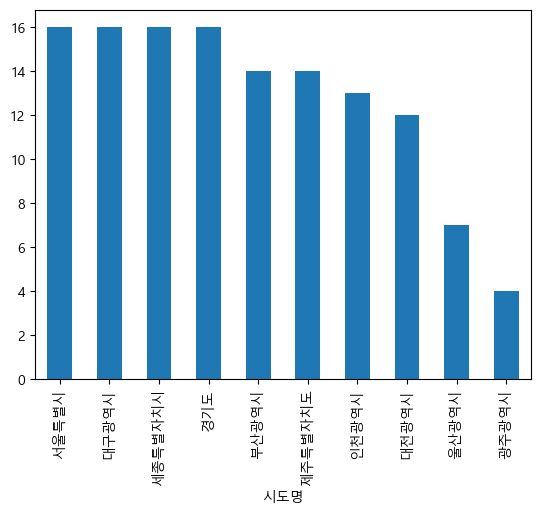

In [26]:
# 위에서 구한 over_mean의 시도명이 몇건씩 나타났는지 막대 그래프로 출력하세요. 
over_mean['시도명'].value_counts().plot.bar()

In [27]:
#월평균순자산평가금액 평균치(전체평균)를 초과한 데이터를 추출하여 출력하세요.
mmean2 = df['월평균순자산평가금액'].mean()
over_mean2 = df.loc[df['월평균순자산평가금액'] > mmean2]
over_mean2

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,1,11,서울특별시,40250,38273,0.15,0.04,0.46
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
7,202101,1,36,세종특별자치시,27572,24909,0.15,0.06,0.72
8,202101,1,41,경기도,25484,23355,0.18,0.04,0.57
16,202101,1,50,제주특별자치도,20221,19012,0.17,0.06,0.27
...,...,...,...,...,...,...,...,...,...
5,202204,1,30,대전광역시,23739,22143,0.21,0.05,0.58
6,202204,1,31,울산광역시,21621,19917,0.23,0.05,0.61
7,202204,1,36,세종특별자치시,32922,30186,0.21,0.06,0.75
8,202204,1,41,경기도,30666,28360,0.19,0.04,0.59


In [28]:
# 위에서 구한 over_mean의 시도명이 몇건씩 나타났는지 출력하세요. 
# 전체 데이터 중 몇 퍼센트에 해당하는지 출력하세요.

display(over_mean2['시도명'].value_counts())

display (f'전체건수 : {len((df))}, 평균초과건수: {len(over_mean2)}, 비율:{len(over_mean2)/len(df)*100:.2f}%') 

시도명
서울특별시      16
대구광역시      16
세종특별자치시    16
경기도        16
제주특별자치도    16
부산광역시      14
대전광역시      12
인천광역시      11
울산광역시       6
광주광역시       3
Name: count, dtype: int64

'전체건수 : 272, 평균초과건수: 126, 비율:46.32%'

<Axes: xlabel='시도명'>

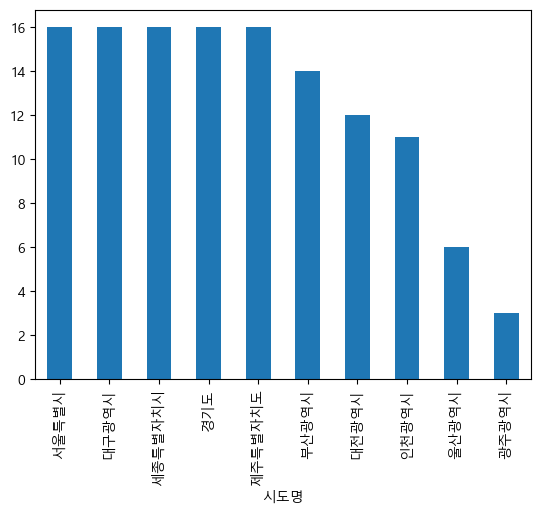

In [29]:
# 위에서 구한 over_mean의 시도명이 몇건씩 나타났는지 막대 그래프로 출력하세요. 
over_mean2['시도명'].value_counts().plot.bar()

'분석컬럼명: 자가거주비율'

'자가거주비율컬럼의 평균값 : 0.2012'

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65
6,202101,1,31,울산광역시,18392,16701,0.23,0.05,0.57
10,202101,1,43,충청북도,12492,11351,0.21,0.05,0.48
12,202101,1,45,전라북도,12089,11108,0.21,0.04,0.49
...,...,...,...,...,...,...,...,...,...
10,202204,1,43,충청북도,14582,13358,0.21,0.04,0.50
12,202204,1,45,전라북도,13676,12642,0.21,0.04,0.50
13,202204,1,46,전라남도,12304,11334,0.21,0.05,0.41
14,202204,1,47,경상북도,12871,11879,0.22,0.05,0.45


'시도별 <자가거주비율>의 평균초과건수 분석'

시도명
대구광역시      16
광주광역시      16
울산광역시      16
충청북도       16
전라북도       16
경상남도       16
경상북도       14
강원도        13
대전광역시       7
전라남도        7
세종특별자치시     4
Name: count, dtype: int64

'전체건수 : 272, 평균초과건수: 141, 비율:51.84%'

'시도별 자가거주비율의 평균초과건수에 대한 막대 그래프'

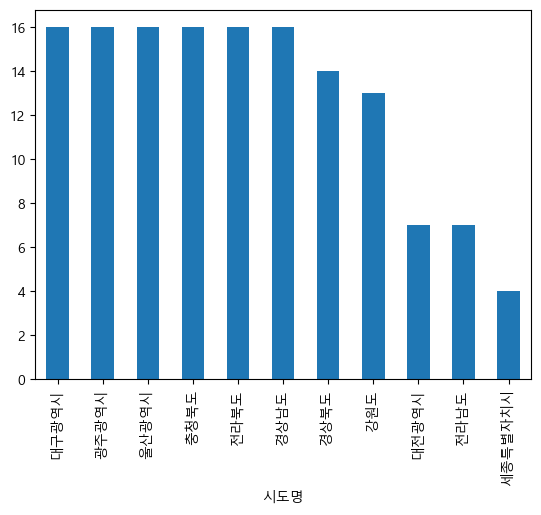

In [30]:
# 자가거주비율 분석 
# 반복적으로 수행되는 정보를 함수로 구현하세요. 
# 함수명: over_means
# 함수(데이터프레임, 컬럼명)
# 기능: 자가거주비율 평균치(전체평균)를 초과한 데이터를 추출하여 출력
#       평균초과 필터링 결과에서 시도명이 몇건씩 나타났는지 출력 
#       전체 데이터 중 몇 퍼센트에 해당하는지 출력
#       시도별 자가거주비율 평균초과건수에 대한 막대 그래프 출력 

def over_means(df, col):
    display(f'분석컬럼명: {col}')
    m = df[col].mean()
    display(f'{col}컬럼의 평균값 : {m:.4f}')
    over_mean = df.loc[df[col] > m]
    display(over_mean)
    display(f'시도별 <{col}>의 평균초과건수 분석')
    display(over_mean['시도명'].value_counts())
    display (f'전체건수 : {len((df))}, 평균초과건수: {len(over_mean)}, 비율:{len(over_mean)/len(df)*100:.2f}%') 
    display(f'시도별 {col}의 평균초과건수에 대한 막대 그래프')
    over_mean['시도명'].value_counts().plot.bar()  
    
over_means(df, '자가거주비율')


'분석컬럼명: 다주택자수비율'

'다주택자수비율컬럼의 평균값 : 0.0476'

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65
5,202101,1,30,대전광역시,19496,18028,0.20,0.05,0.57
6,202101,1,31,울산광역시,18392,16701,0.23,0.05,0.57
...,...,...,...,...,...,...,...,...,...
11,202204,1,44,충청남도,14897,13632,0.20,0.05,0.47
13,202204,1,46,전라남도,12304,11334,0.21,0.05,0.41
14,202204,1,47,경상북도,12871,11879,0.22,0.05,0.45
15,202204,1,48,경상남도,15790,14336,0.22,0.05,0.53


'시도별 <다주택자수비율>의 평균초과건수 분석'

시도명
부산광역시      16
광주광역시      16
대전광역시      16
울산광역시      16
세종특별자치시    16
강원도        16
경상북도       16
경상남도       16
제주특별자치도    16
충청남도       14
충청북도       13
전라남도        3
대구광역시       1
Name: count, dtype: int64

'전체건수 : 272, 평균초과건수: 175, 비율:64.34%'

'시도별 다주택자수비율의 평균초과건수에 대한 막대 그래프'

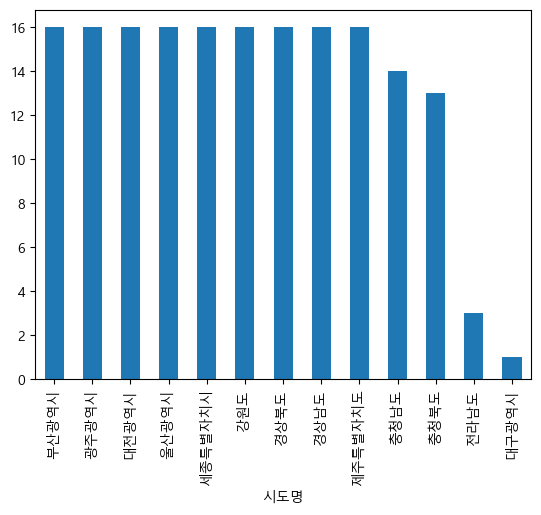

In [31]:
# <다주택자수비율 분석>
# 다주택자수비율 평균치(전체평균)를 초과한 데이터를 추출하여 출력, 
# 평균초과 필터링 결과에서 시도명이 몇건씩 나타났는지 출력, 
# 전체 데이터 중 몇 퍼센트에 해당하는지 출력
# 시도별 다주택자수비율 평균초과건수에 대한 막대 그래프 출력 
# 위에서 구현한 함수를 이용하여 출력하세요. 

over_means(df, '다주택자수비율')


'분석컬럼명: 아파트거주비율'

'아파트거주비율컬럼의 평균값 : 0.5327'

,기준년월,블록구분코드,시도코드,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
1,202101,1,26,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,1,27,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,1,28,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,1,29,광주광역시,18336,16739,0.22,0.05,0.65
5,202101,1,30,대전광역시,19496,18028,0.20,0.05,0.57
...,...,...,...,...,...,...,...,...,...
4,202204,1,29,광주광역시,20873,19156,0.23,0.05,0.67
5,202204,1,30,대전광역시,23739,22143,0.21,0.05,0.58
6,202204,1,31,울산광역시,21621,19917,0.23,0.05,0.61
7,202204,1,36,세종특별자치시,32922,30186,0.21,0.06,0.75


'시도별 <아파트거주비율>의 평균초과건수 분석'

시도명
부산광역시      16
대구광역시      16
인천광역시      16
광주광역시      16
대전광역시      16
울산광역시      16
세종특별자치시    16
경기도        16
Name: count, dtype: int64

'전체건수 : 272, 평균초과건수: 128, 비율:47.06%'

'시도별 아파트거주비율의 평균초과건수에 대한 막대 그래프'

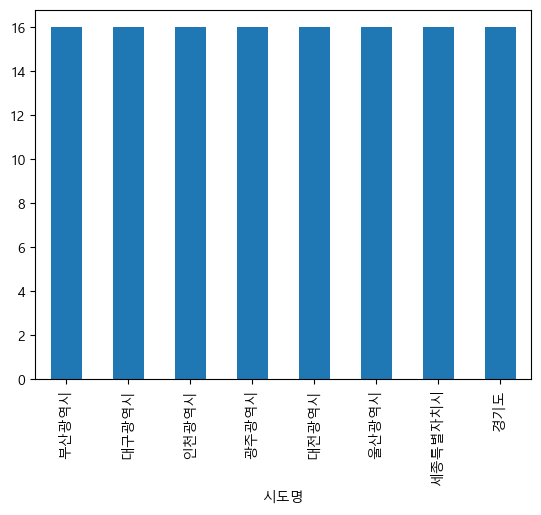

In [32]:
# <아파트거주비율 분석> 
# 아파트거주비율 평균치(전체평균)를 초과한 데이터를 추출하여 출력, 
# 평균초과 필터링 결과에서 시도명이 몇건씩 나타났는지 출력, 
# 전체 데이터 중 몇 퍼센트에 해당하는지 출력
# 시도별 아파트거주비율 평균초과건수에 대한 막대 그래프 출력 
# 위에서 구현한 함수를 이용하여 출력하세요. 

over_means(df, '아파트거주비율')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 전처리

In [33]:
# "블록구분코드", "시도코드" 열을 삭제하세요.
df = df.drop(['블록구분코드', '시도코드'], axis = 1)
df.head()

,기준년월,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
0,202101,서울특별시,40250,38273,0.15,0.04,0.46
1,202101,부산광역시,20127,18405,0.18,0.05,0.58
2,202101,대구광역시,21734,20052,0.21,0.05,0.58
3,202101,인천광역시,19671,17710,0.19,0.04,0.56
4,202101,광주광역시,18336,16739,0.22,0.05,0.65


In [34]:
# "월평균총자산평가금액" 열의 값에서 "월평균순자산평가금액" 열의 값을 뺀 결과를 "월평균대출금액" 열에 추가하세요.
df['월평균대출금액'] = df['월평균총자산평가금액'] - df['월평균순자산평가금액']
df.head()

,기준년월,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
0,202101,서울특별시,40250,38273,0.15,0.04,0.46,1977
1,202101,부산광역시,20127,18405,0.18,0.05,0.58,1722
2,202101,대구광역시,21734,20052,0.21,0.05,0.58,1682
3,202101,인천광역시,19671,17710,0.19,0.04,0.56,1961
4,202101,광주광역시,18336,16739,0.22,0.05,0.65,1597


In [35]:
# "기준년월" 열의 데이터타입을 문자열로 변경하세요.
df['기준년월'] = df['기준년월'].astype('str')
df.dtypes

기준년월           object
시도명            object
월평균총자산평가금액      int64
월평균순자산평가금액      int64
자가거주비율        float64
다주택자수비율       float64
아파트거주비율       float64
월평균대출금액         int64
dtype: object

In [36]:
# "기준년월" 열을 인덱스로 설정하세요.
df = df.set_index('기준년월')
df

,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
기준년월,,,,,,,
202101,서울특별시,40250,38273,0.15,0.04,0.46,1977
202101,부산광역시,20127,18405,0.18,0.05,0.58,1722
202101,대구광역시,21734,20052,0.21,0.05,0.58,1682
202101,인천광역시,19671,17710,0.19,0.04,0.56,1961
202101,광주광역시,18336,16739,0.22,0.05,0.65,1597
...,...,...,...,...,...,...,...
202204,전라북도,13676,12642,0.21,0.04,0.50,1034
202204,전라남도,12304,11334,0.21,0.05,0.41,970
202204,경상북도,12871,11879,0.22,0.05,0.45,992


##### 추세분석

In [37]:
# 연속형 컬럼에 대해서 추세분석을 해봅시다.
con_val

['월평균총자산평가금액', '월평균순자산평가금액', '자가거주비율', '다주택자수비율', '아파트거주비율']

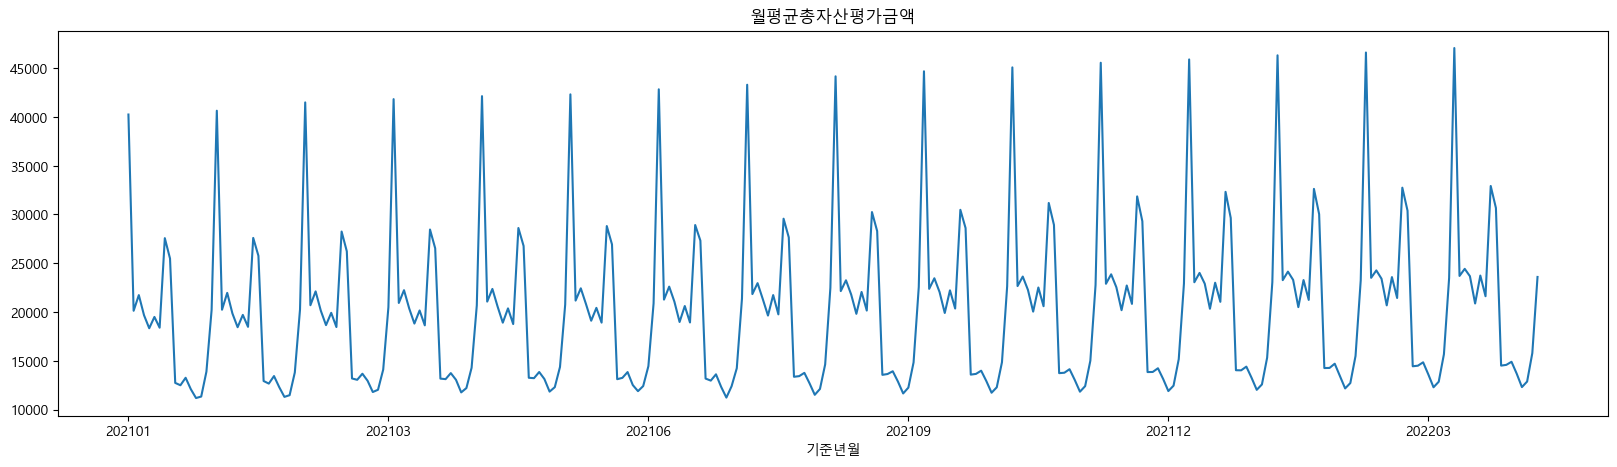

In [38]:
# 판다스 시각화 방법으로 아래 그래프를 그리세요. 
df['월평균총자산평가금액'].plot(figsize=(20,5), use_index=True, title='월평균총자산평가금액')
plt.show()

<Axes: xlabel='기준년월', ylabel='월평균총자산평가금액'>

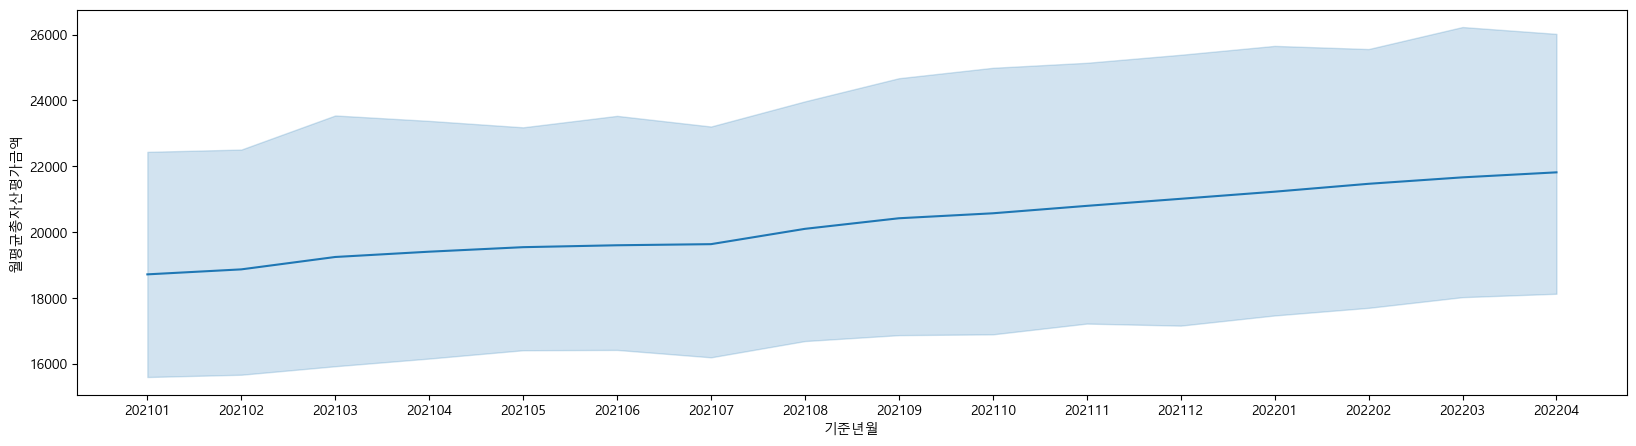

In [39]:
# Seaborn을 이용하여 아래 월평균총자산평가금액에 대한 그래프를 그리세요.
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='월평균총자산평가금액')

<Axes: xlabel='기준년월', ylabel='월평균총자산평가금액'>

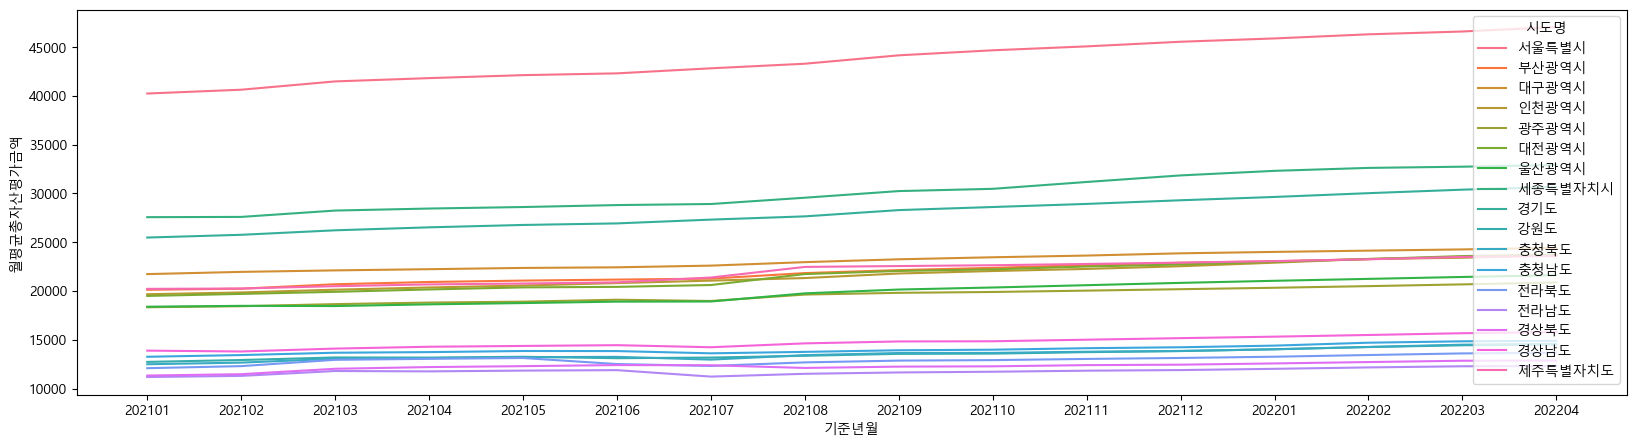

In [40]:
# Seaborn을 이용하여 아래 월평균총자산평가금액에 대한 그래프를 그리세요.
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='월평균총자산평가금액', hue='시도명')

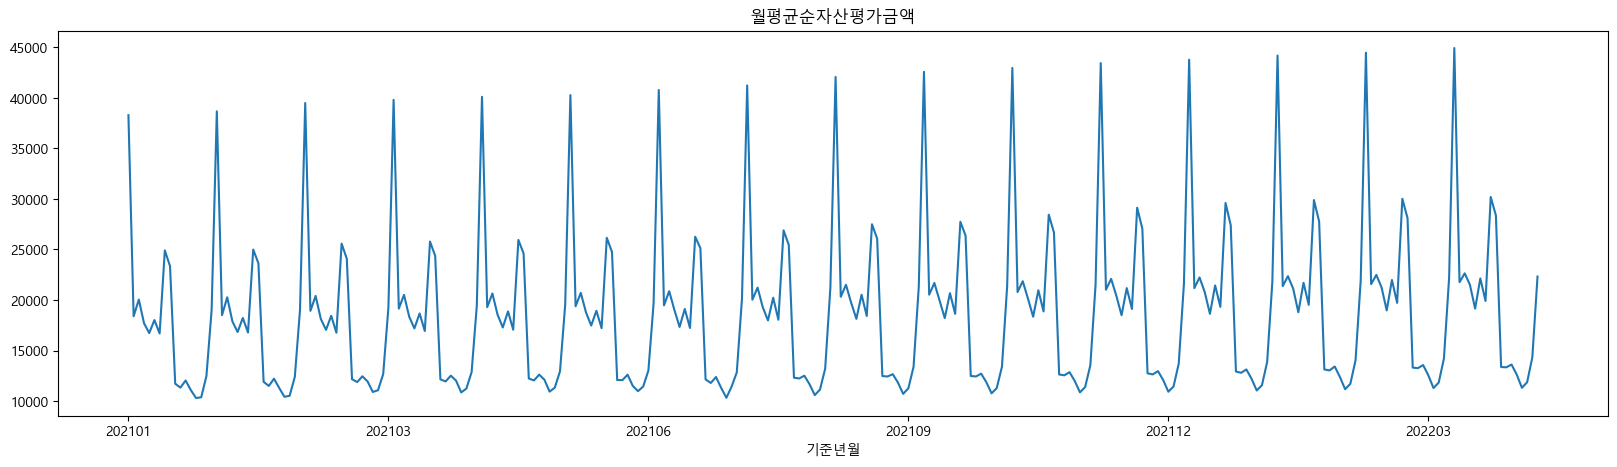

In [41]:
 
# 판다스 시각화 방법으로 아래 그래프를 그리세요. 
df['월평균순자산평가금액'].plot(figsize=(20,5), use_index=True, title='월평균순자산평가금액')
plt.show()

<Axes: xlabel='기준년월', ylabel='월평균순자산평가금액'>

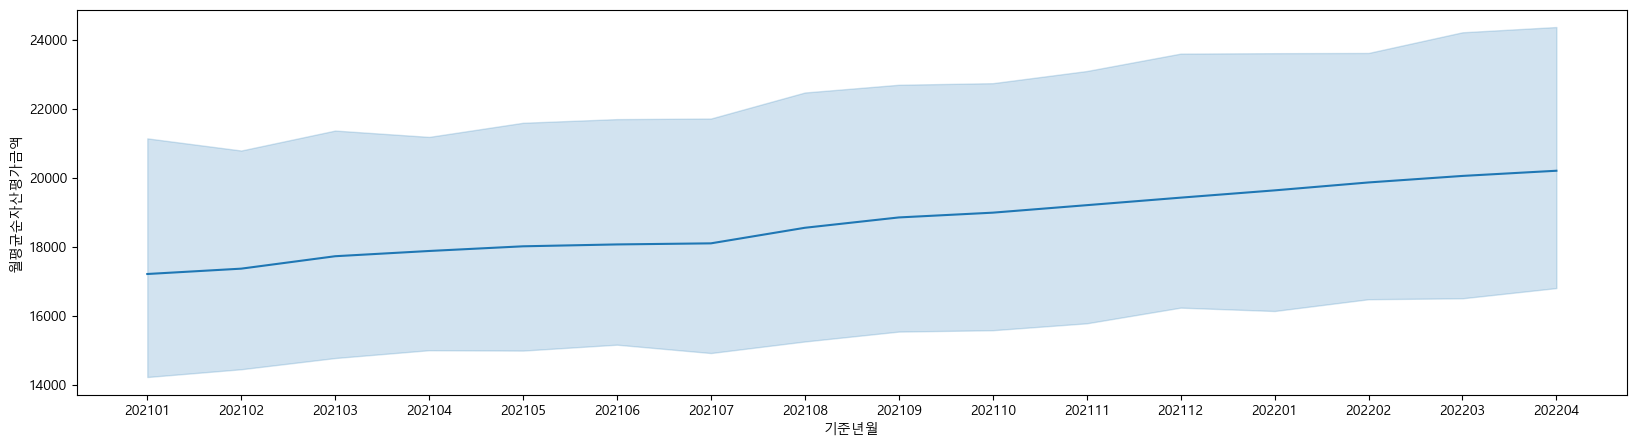

In [42]:
# Seaborn을 이용하여 아래 월평균순자산평가금액에 대한 그래프를 그리세요.
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='월평균순자산평가금액')

<Axes: xlabel='기준년월', ylabel='월평균순자산평가금액'>

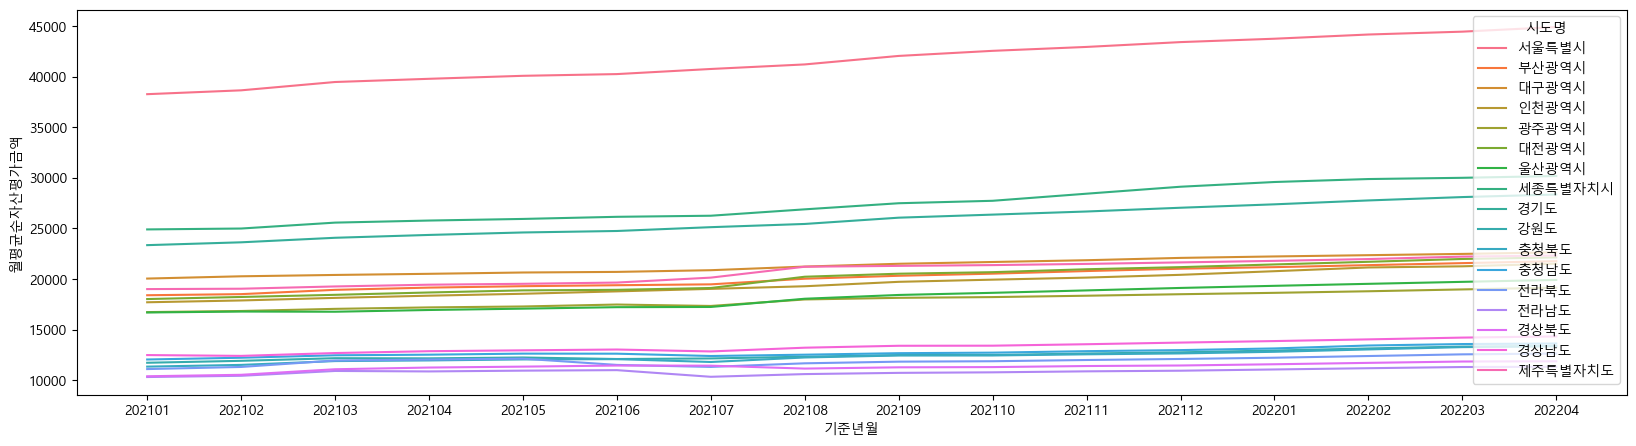

In [43]:
# Seaborn을 이용하여 아래 월평균총자산평가금액에 대한 그래프를 그리세요.
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x=df.index, y='월평균순자산평가금액', hue='시도명')

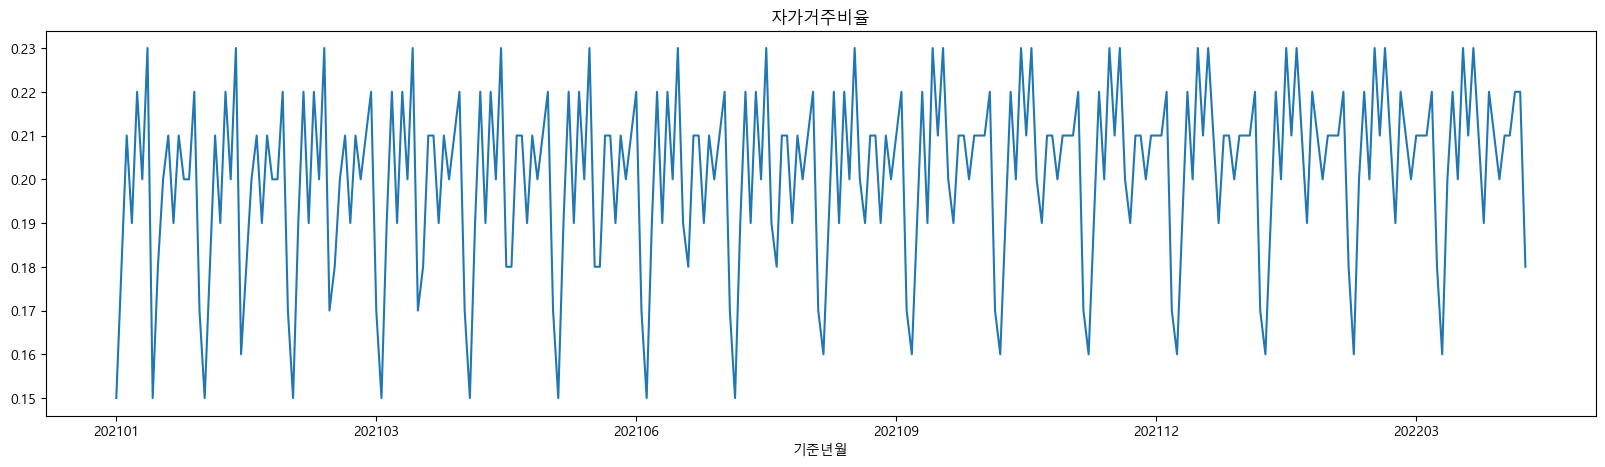

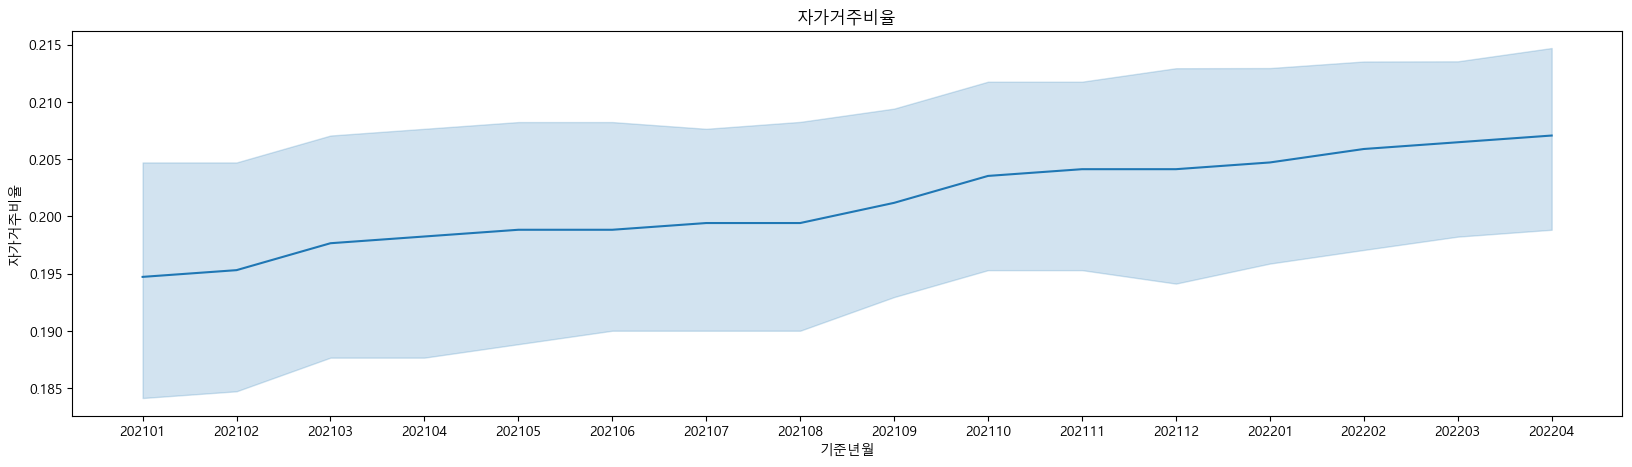

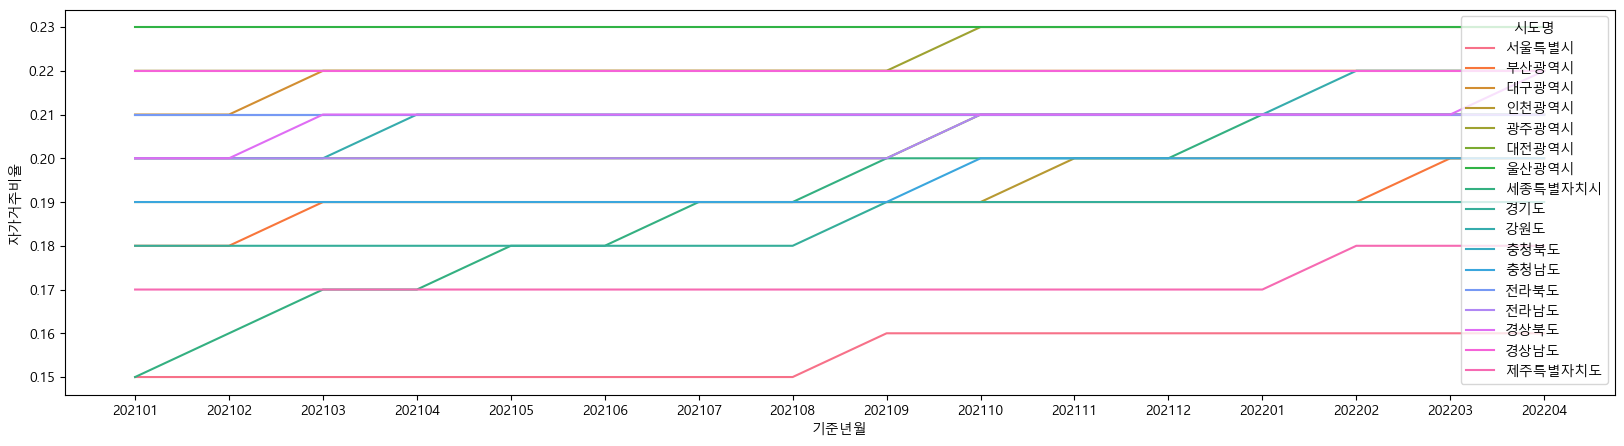

In [44]:
# 자가거주비율을 함수 이용하여 추세 그래프를 그려보세요. 
# 함수명 show_trend(데이터프레임, 컬럼명)
# 기능: 판다스 시각화 기능을 이용한 라인그래프 (x축은 기준년월, y축은 컬럼명의 값) 
#       Seaborn을 이용한 라인그래프(x축은 기준년월, y축은 컬럼명의 값) 
#       Seaborn을 이용한 라인그래프((x축은 기준년월, y축은 컬럼명의 값) , 시도별 카테고리적용) 
       
def show_trend(df,col):
    df[col].plot(figsize=(20,5), use_index=True, title=col)
    plt.figure(figsize=(20,5))
    sns.lineplot(data=df, x=df.index, y=col)
    plt.title(col)
    plt.figure(figsize=(20,5))
    sns.lineplot(data=df, x=df.index, y=col, hue='시도명')
    #plt.show()

show_trend(df, '자가거주비율')

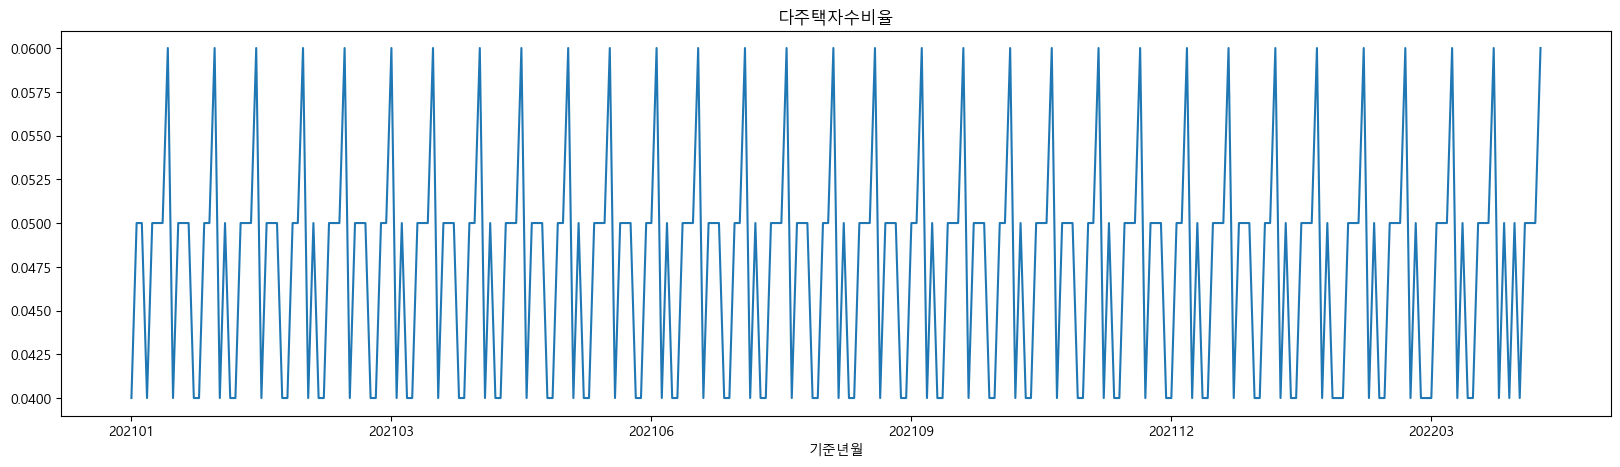

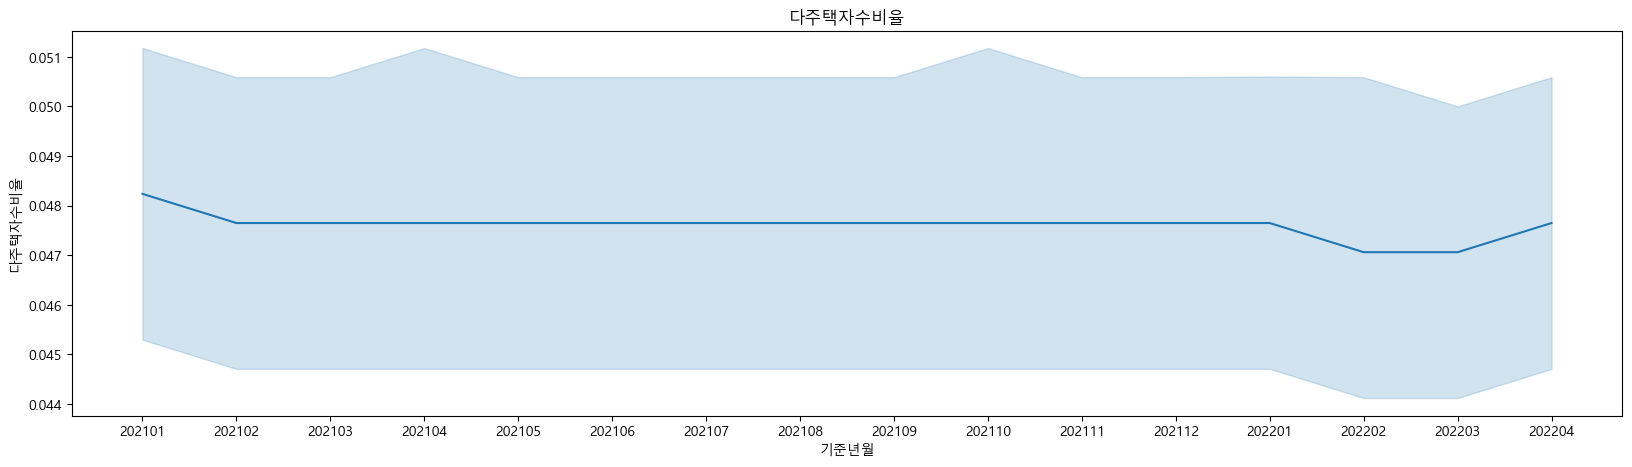

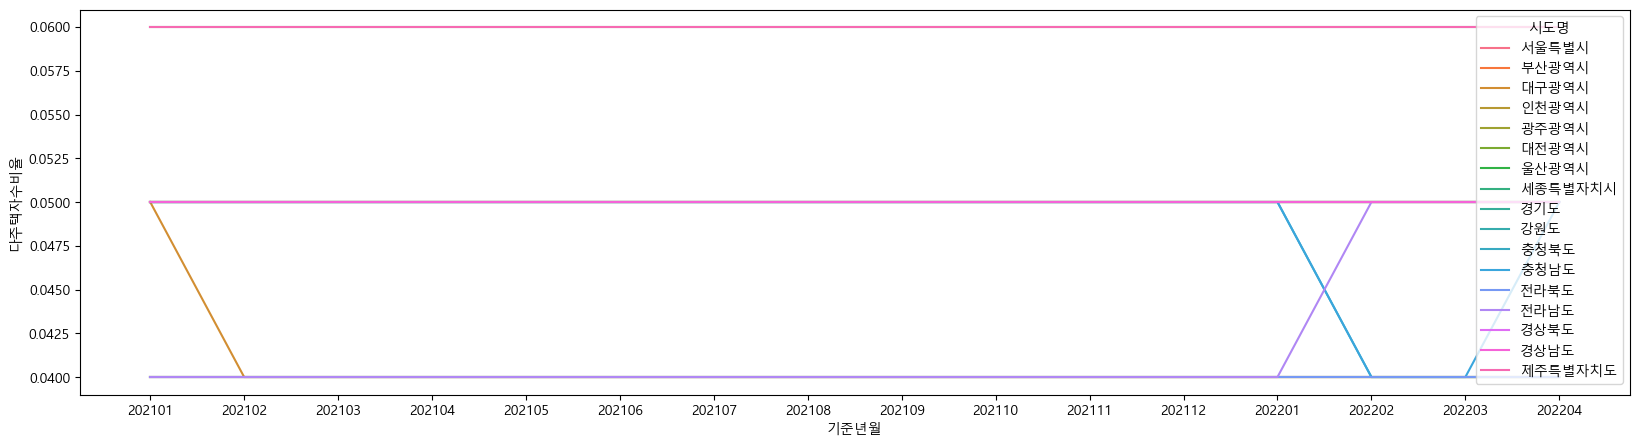

In [45]:

# 다주택자수비율을 함수 이용하여 추세 그래프를 그려보세요. 

show_trend(df, '다주택자수비율')

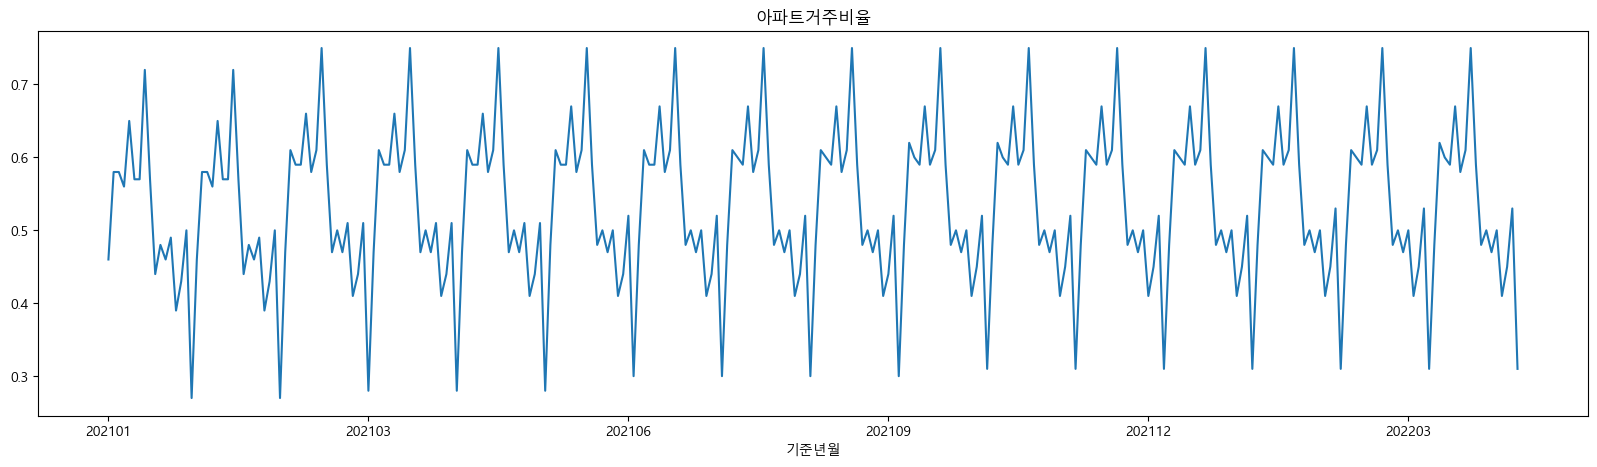

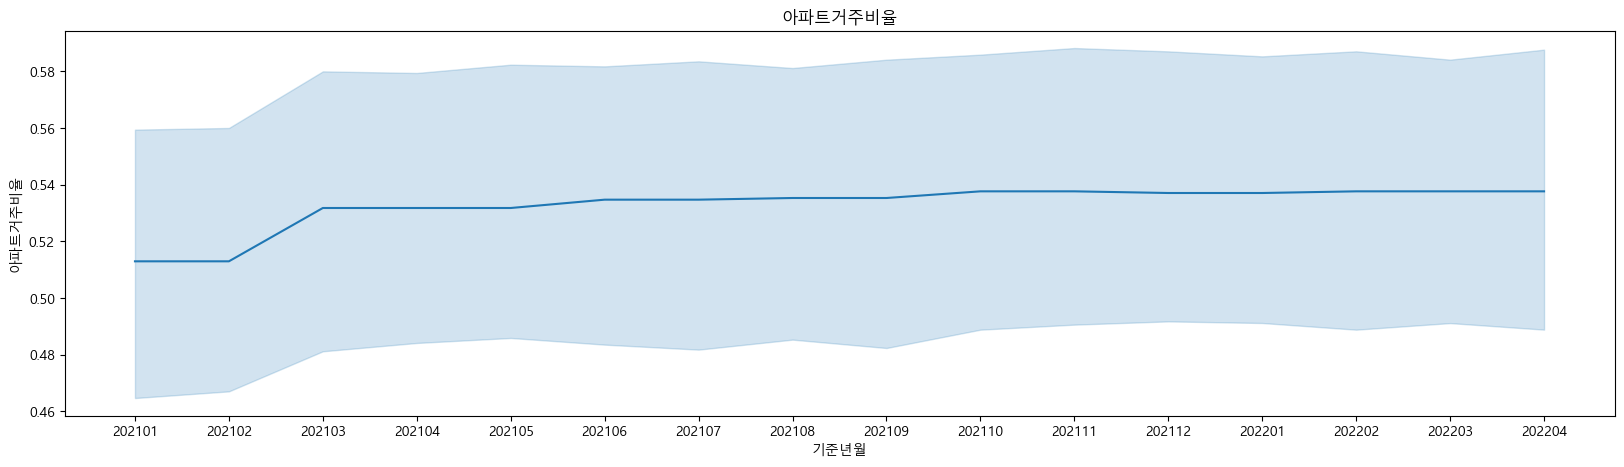

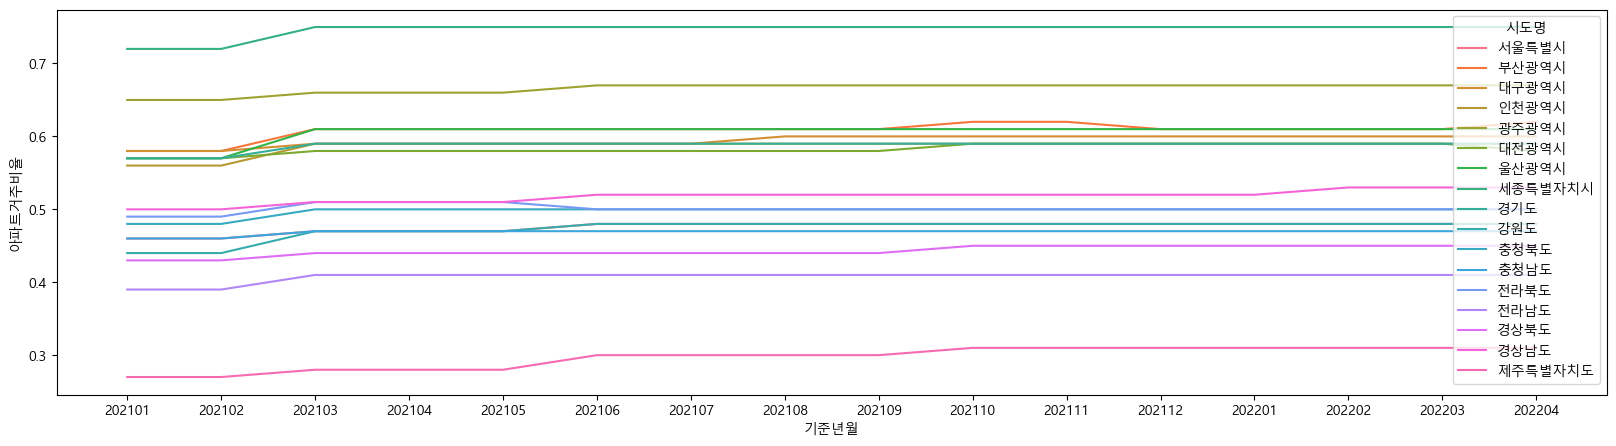

In [46]:
# 아파트거주비율을 함수 이용하여 추세 그래프를 그려보세요. 

show_trend(df, '아파트거주비율')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### 서울 데이터 분석

In [47]:
# 서울 데이터만 선택하여 변수 seoul에 저장하세요.
seoul = df[df['시도명'] == '서울특별시']
seoul

,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
기준년월,,,,,,,
202101,서울특별시,40250,38273,0.15,0.04,0.46,1977
202102,서울특별시,40640,38653,0.15,0.04,0.46,1987
202103,서울특별시,41492,39476,0.15,0.04,0.47,2016
202104,서울특별시,41828,39792,0.15,0.04,0.47,2036
202105,서울특별시,42134,40088,0.15,0.04,0.47,2046
202106,서울특별시,42317,40258,0.15,0.04,0.48,2059
202107,서울특별시,42835,40763,0.15,0.04,0.48,2072
202108,서울특별시,43304,41213,0.15,0.04,0.48,2091
202109,서울특별시,44166,42053,0.16,0.04,0.48,2113


In [48]:
# seoul에서 "월평균총자산평가금액", "월평균총자산평가금액" 열을 선택하세요.
seoul[['월평균총자산평가금액', '월평균순자산평가금액']]

,월평균총자산평가금액,월평균순자산평가금액
기준년월,,
202101,40250,38273
202102,40640,38653
202103,41492,39476
202104,41828,39792
202105,42134,40088
202106,42317,40258
202107,42835,40763
202108,43304,41213
202109,44166,42053


<Axes: xlabel='기준년월'>

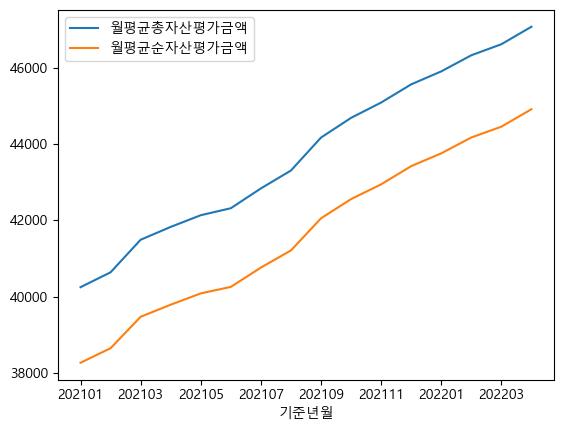

In [49]:
# 위의 결과를 선그래프로 시각화하세요. (DataFrame.plot() 함수 이용)
seoul[['월평균총자산평가금액', '월평균순자산평가금액']].plot()

In [50]:
# seoul에서 '202101', '202204'행, '월평균총자산평가금액', '월평균순자산평가금액', '월평균대출금액' 열을 선택하세요.
temp = seoul.loc[['202101', '202204'], ['월평균총자산평가금액', '월평균순자산평가금액', '월평균대출금액']]
temp

,월평균총자산평가금액,월평균순자산평가금액,월평균대출금액
기준년월,,,
202101,40250,38273,1977
202204,47067,44908,2159


In [51]:
# 행과 열을 대칭하세요.
temp = temp.T
temp

기준년월,202101,202204
월평균총자산평가금액,40250,47067
월평균순자산평가금액,38273,44908
월평균대출금액,1977,2159


<Axes: >

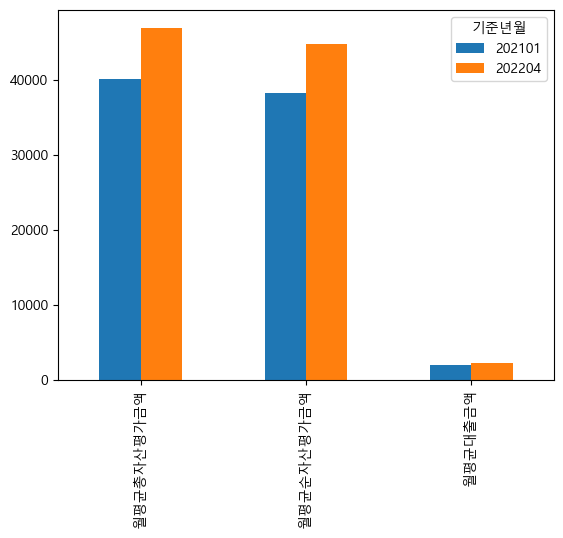

In [52]:
# temp를 막대그래프로 시각화하세요. (DataFrame.plot(kind = 'bar') 함수 이용)
temp.plot(kind = 'bar')

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 지역 별 분포 확인

In [53]:
df.head()

,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
기준년월,,,,,,,
202101,서울특별시,40250,38273,0.15,0.04,0.46,1977
202101,부산광역시,20127,18405,0.18,0.05,0.58,1722
202101,대구광역시,21734,20052,0.21,0.05,0.58,1682
202101,인천광역시,19671,17710,0.19,0.04,0.56,1961
202101,광주광역시,18336,16739,0.22,0.05,0.65,1597


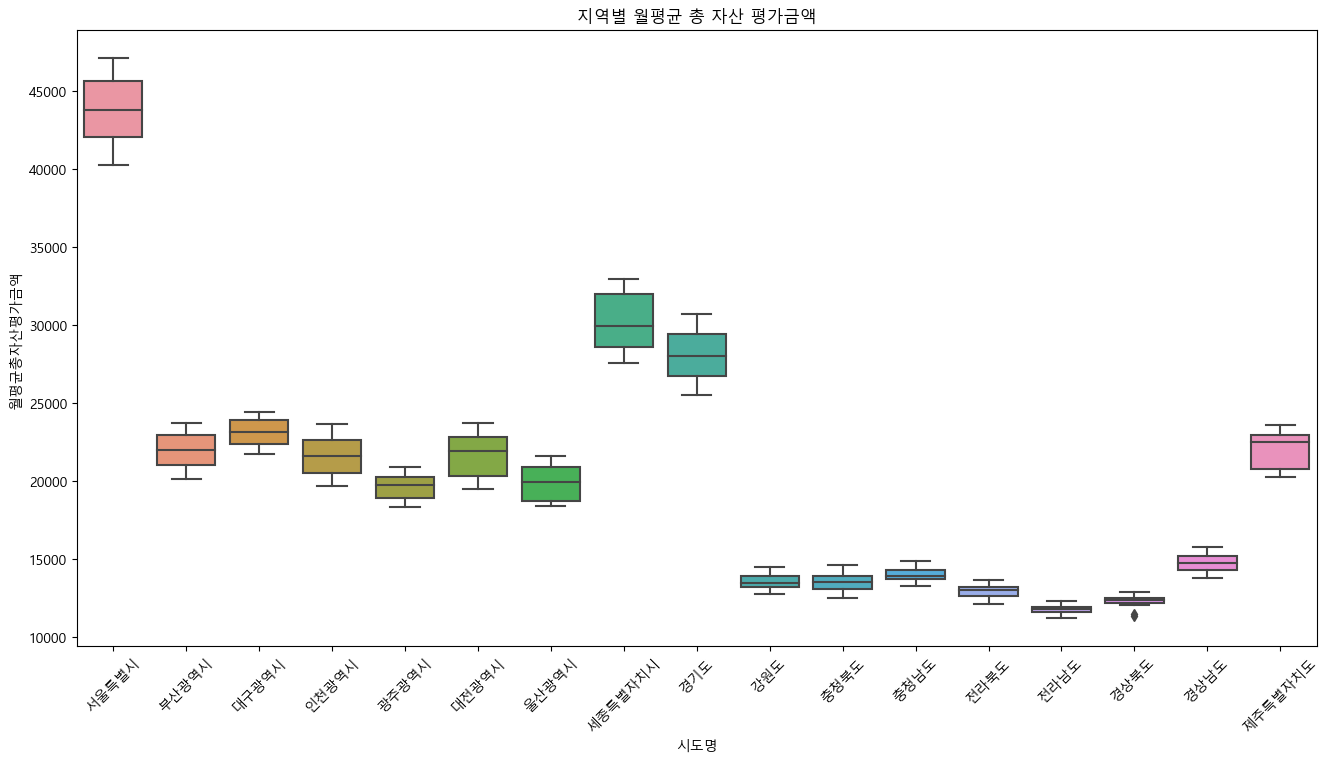

In [54]:
# 지역별 월평균총자산평가금액을 박스플롯으로 시각화하세요.
plt.figure(figsize = (16,8))
sns.boxplot(x = '시도명', y = '월평균총자산평가금액', data = df)
plt.title('지역별 월평균 총 자산 평가금액')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='시도명', ylabel='아파트거주비율'>

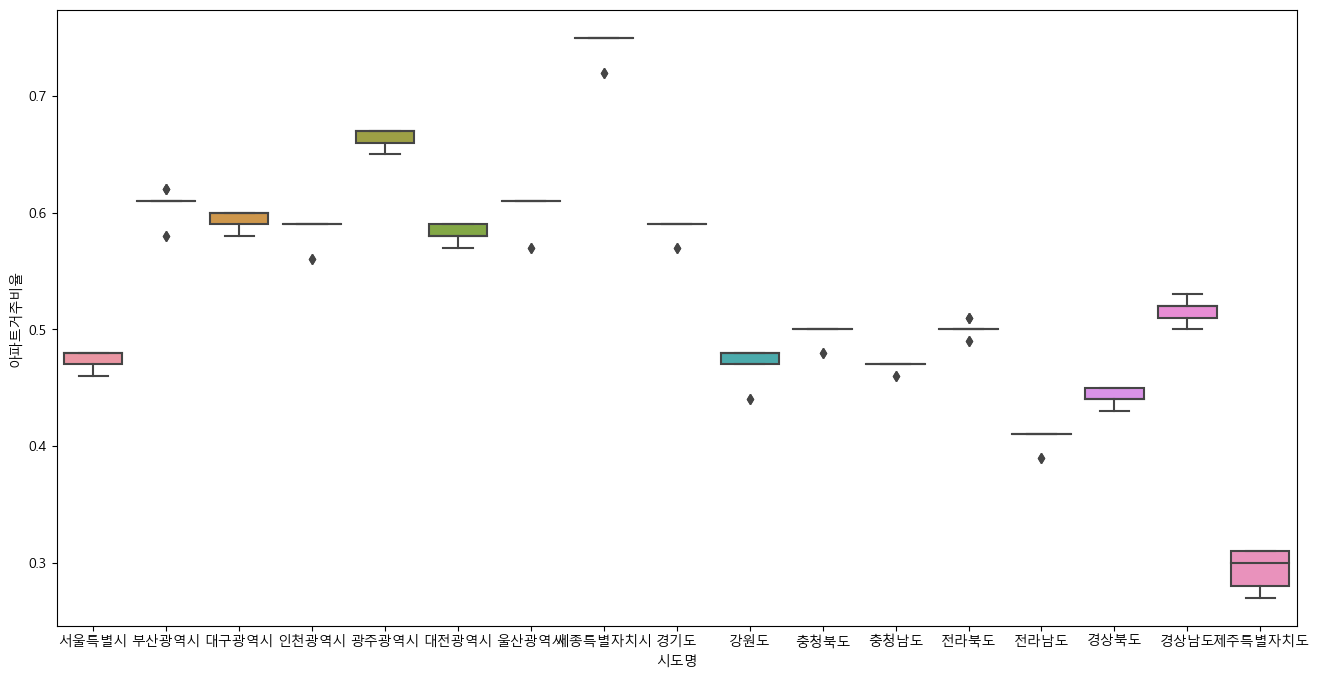

In [55]:
# seaborn을 이용하여 지역별 아파트거주비율을 박스플롯으로 시각화하세요.
plt.figure(figsize = (16,8))
sns.boxplot(x = '시도명', y = '아파트거주비율', data = df)

<Axes: xlabel='시도명', ylabel='월평균대출금액'>

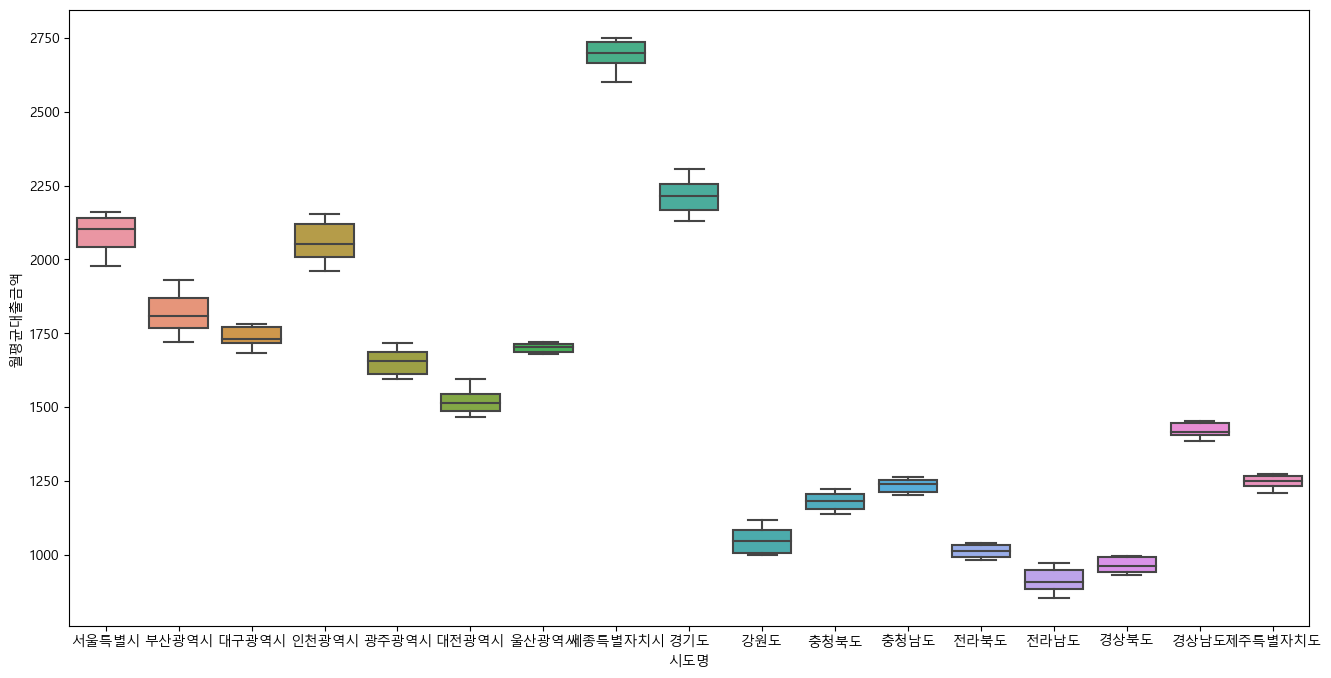

In [56]:
# seaborn을 이용하여 지역별 월평균대출금액을 박스플롯으로 시각화하세요.
plt.figure(figsize = (16,8))
sns.boxplot(x = '시도명', y = '월평균대출금액', data = df)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## 2021년 1월, 2022년 4월 데이터 분석

In [57]:
# 2021년 1월 데이터를 선택하여 prev에 저장하세요.
prev = df[df.index == '202101']
prev

,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
기준년월,,,,,,,
202101,서울특별시,40250,38273,0.15,0.04,0.46,1977
202101,부산광역시,20127,18405,0.18,0.05,0.58,1722
202101,대구광역시,21734,20052,0.21,0.05,0.58,1682
202101,인천광역시,19671,17710,0.19,0.04,0.56,1961
202101,광주광역시,18336,16739,0.22,0.05,0.65,1597
202101,대전광역시,19496,18028,0.20,0.05,0.57,1468
202101,울산광역시,18392,16701,0.23,0.05,0.57,1691
202101,세종특별자치시,27572,24909,0.15,0.06,0.72,2663
202101,경기도,25484,23355,0.18,0.04,0.57,2129


In [58]:
# 2022년 4월 데이터를 선택하여 recent에 저장하세요.
recent = df[df.index == '202204']
recent

,시도명,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
기준년월,,,,,,,
202204,서울특별시,47067,44908,0.16,0.04,0.48,2159
202204,부산광역시,23700,21770,0.20,0.05,0.62,1930
202204,대구광역시,24426,22643,0.22,0.04,0.60,1783
202204,인천광역시,23673,21518,0.20,0.04,0.59,2155
202204,광주광역시,20873,19156,0.23,0.05,0.67,1717
202204,대전광역시,23739,22143,0.21,0.05,0.58,1596
202204,울산광역시,21621,19917,0.23,0.05,0.61,1704
202204,세종특별자치시,32922,30186,0.21,0.06,0.75,2736
202204,경기도,30666,28360,0.19,0.04,0.59,2306


In [59]:
# 두 데이터프레임의 "시도명" 열을 인덱스로 설정하세요.
prev = prev.set_index('시도명')
recent = recent.set_index('시도명')
recent

,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율,월평균대출금액
시도명,,,,,,
서울특별시,47067,44908,0.16,0.04,0.48,2159
부산광역시,23700,21770,0.20,0.05,0.62,1930
대구광역시,24426,22643,0.22,0.04,0.60,1783
인천광역시,23673,21518,0.20,0.04,0.59,2155
광주광역시,20873,19156,0.23,0.05,0.67,1717
대전광역시,23739,22143,0.21,0.05,0.58,1596
울산광역시,21621,19917,0.23,0.05,0.61,1704
세종특별자치시,32922,30186,0.21,0.06,0.75,2736
경기도,30666,28360,0.19,0.04,0.59,2306


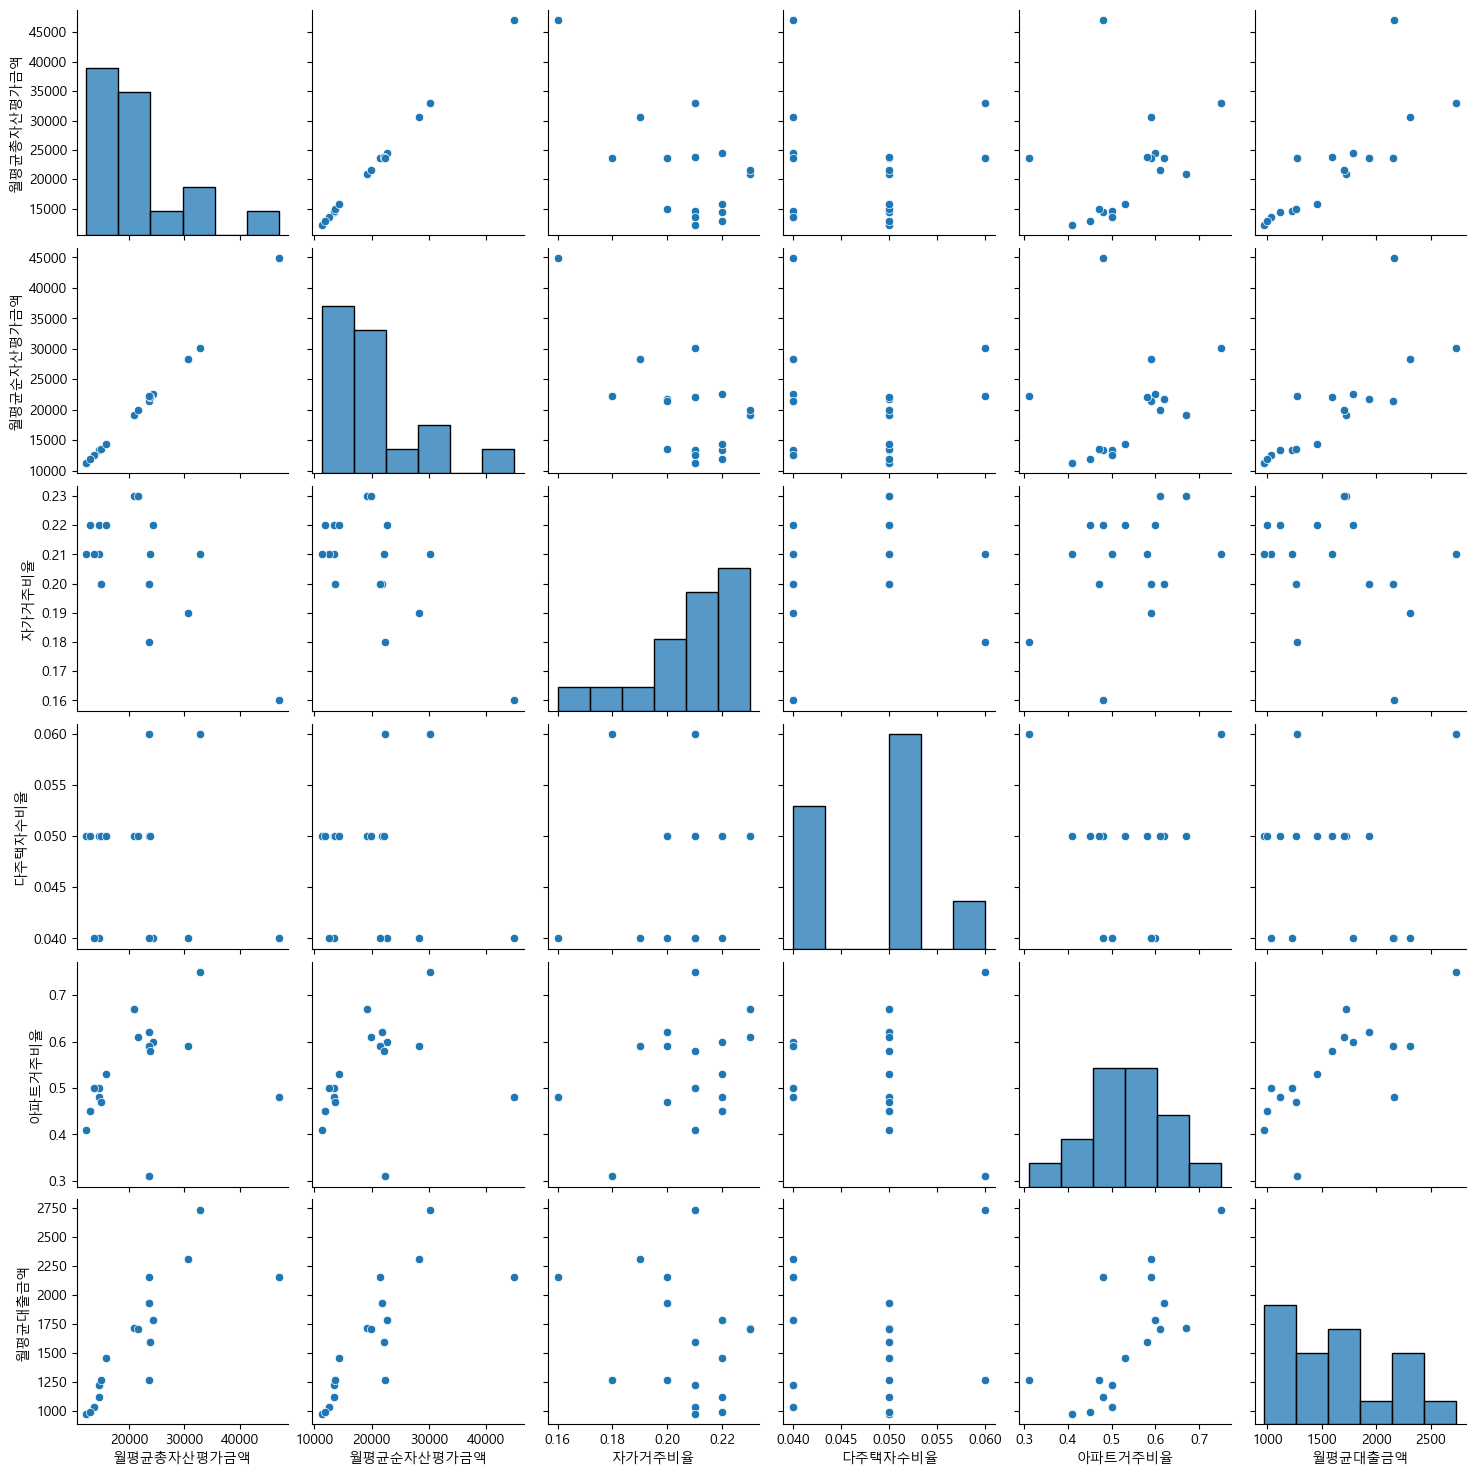

In [60]:
# recent를 pairplot으로 시각화하세요.
sns.pairplot(recent)

<Axes: ylabel='시도명'>

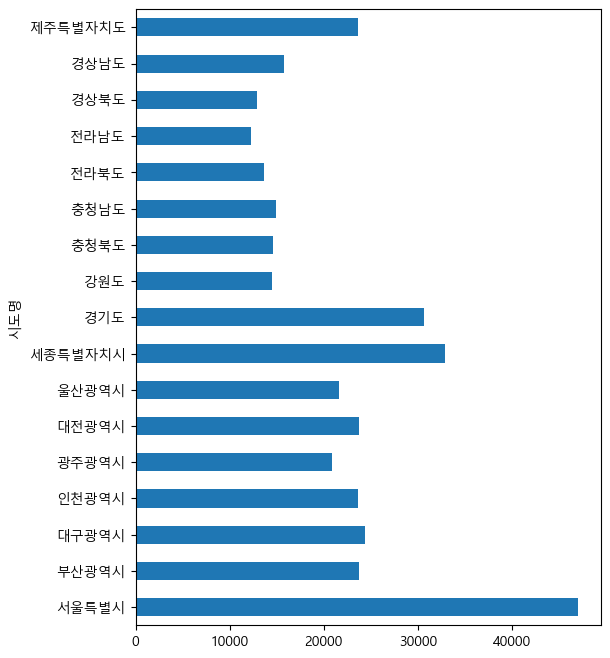

In [61]:
# recent의 "월평균총자산평가금액" 열을 선택하여 수평막대그래프로 시각화하세요. (Series.plot(kind = 'barh') 이용)
recent['월평균총자산평가금액'].plot(kind = 'barh', figsize = (6,8))

<Axes: ylabel='시도명'>

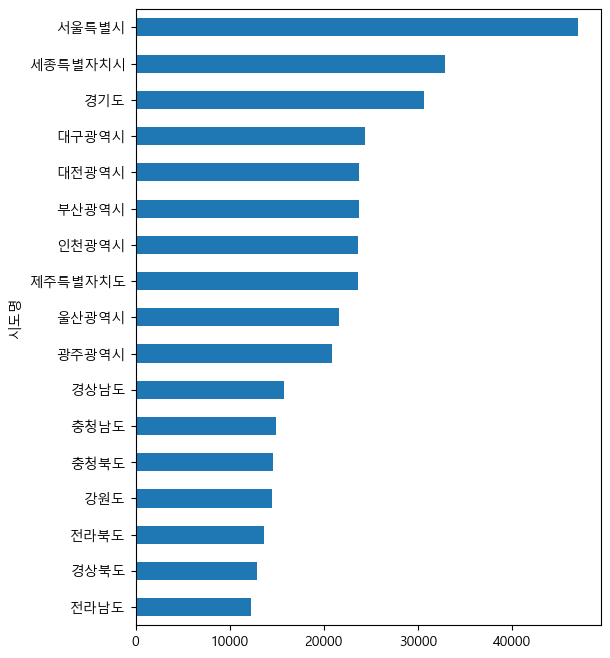

In [62]:
# 오름차순으로 정렬 후 시각화하세요.
recent['월평균총자산평가금액'].sort_values().plot(kind = 'barh', figsize = (6,8))

In [63]:
# recent의 "월평균총자산평가금액" 열에서 prev의 "월평균총자산평가금액" 열을 뺀 결과를 diff에 저장하세요.
diff = recent['월평균총자산평가금액'] - prev['월평균총자산평가금액']
diff

시도명
서울특별시      6817
부산광역시      3573
대구광역시      2692
인천광역시      4002
광주광역시      2537
대전광역시      4243
울산광역시      3229
세종특별자치시    5350
경기도        5182
강원도        1773
충청북도       2090
충청남도       1639
전라북도       1587
전라남도       1123
경상북도       1537
경상남도       1902
제주특별자치도    3374
Name: 월평균총자산평가금액, dtype: int64

<Axes: ylabel='시도명'>

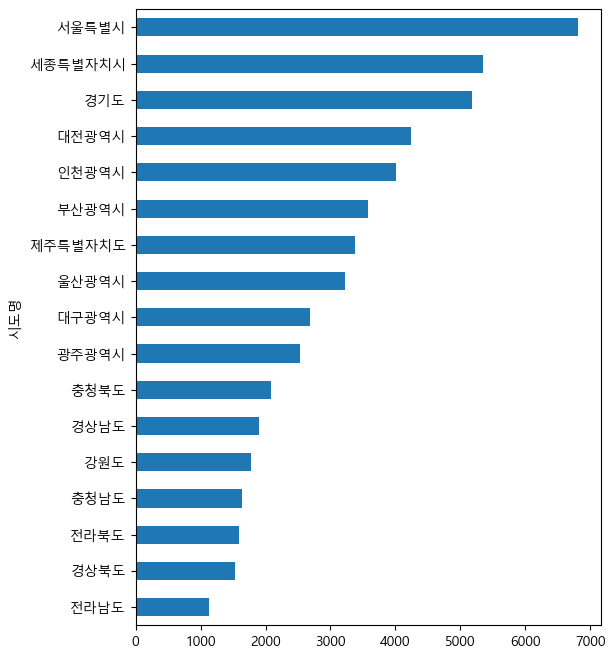

In [64]:
# diff를 정렬한 후 수평막대그래프로 시각화하세요.
diff.sort_values().plot(kind = 'barh', figsize = (6,8))

In [65]:
# recent의 "월평균대출금액" 열에서 prev의 "월평균대출금액" 열을 뺀 결과를 diff에 저장하세요.
diff = recent['월평균대출금액'] - prev['월평균대출금액']
diff

시도명
서울특별시      182
부산광역시      208
대구광역시      101
인천광역시      194
광주광역시      120
대전광역시      128
울산광역시       13
세종특별자치시     73
경기도        177
강원도        117
충청북도        83
충청남도        62
전라북도        53
전라남도       111
경상북도        57
경상남도        59
제주특별자치도     58
Name: 월평균대출금액, dtype: int64

<Axes: ylabel='시도명'>

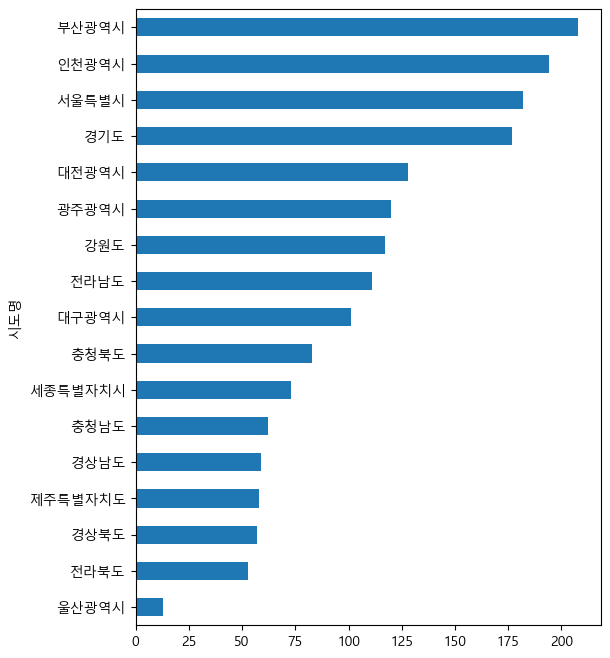

In [66]:
# diff를 정렬한 후 수평막대그래프로 시각화하세요.
diff.sort_values().plot(kind = 'barh', figsize = (6,8))

### 상관분석

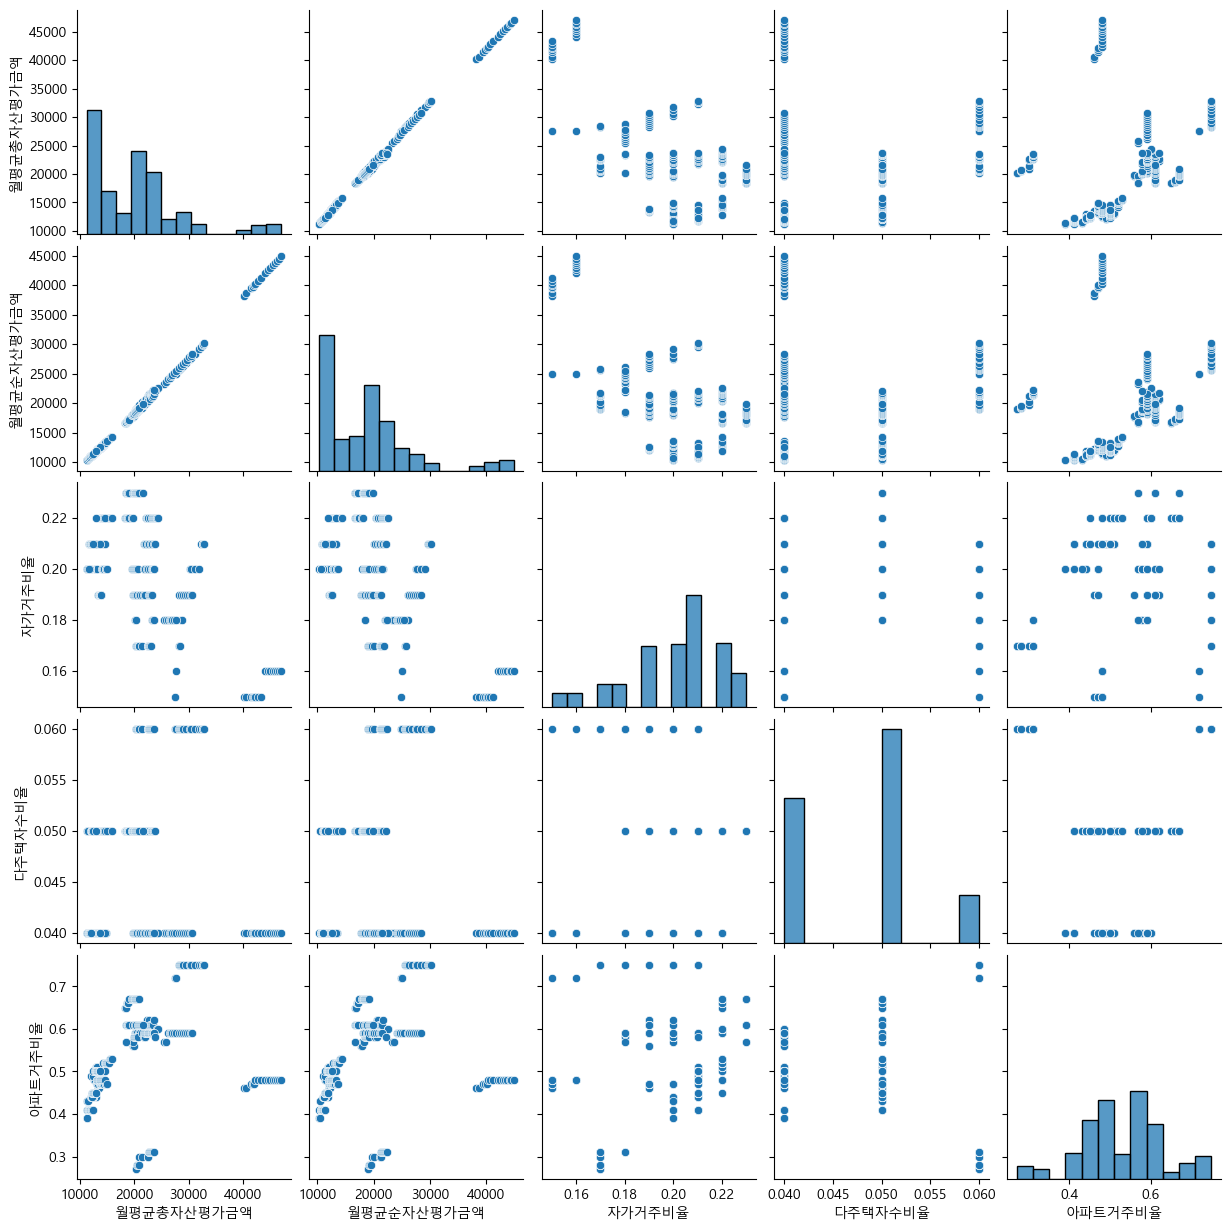

In [67]:
# df의 연속형 컬럼에 대해 seaborn의 pairplot으로 시각화하세요. 
sns.pairplot(df[con_val])

In [68]:
# 연속형 컬럼들의 상관계수를 출력하세요. 
df_corr = df[con_val].corr()
df_corr 

,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
월평균총자산평가금액,1.000000,0.999237,-0.608356,-0.087258,0.308380
월평균순자산평가금액,0.999237,1.000000,-0.617871,-0.093451,0.277445
자가거주비율,-0.608356,-0.617871,1.000000,-0.000329,0.278505
다주택자수비율,-0.087258,-0.093451,-0.000329,1.000000,0.014191
아파트거주비율,0.308380,0.277445,0.278505,0.014191,1.000000


In [69]:
# 월평균총자산평가금액과 나머지 변수들 간의 상관 계수를 출력하세요.
df[con_val].corrwith(df['월평균총자산평가금액'])

월평균총자산평가금액    1.000000
월평균순자산평가금액    0.999237
자가거주비율       -0.608356
다주택자수비율      -0.087258
아파트거주비율       0.308380
dtype: float64

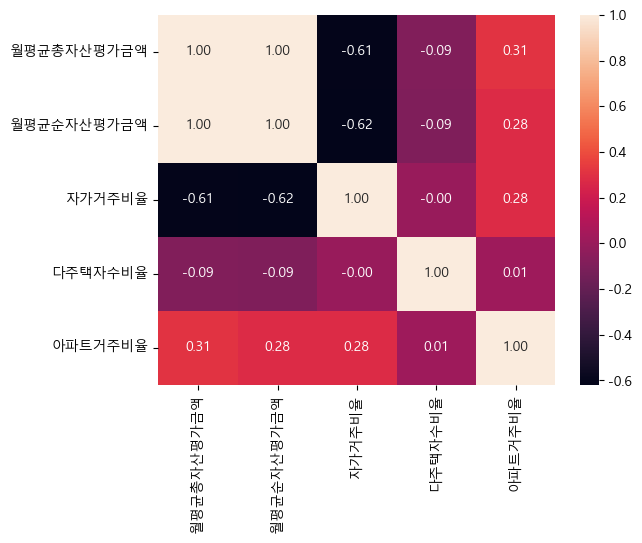

In [70]:
# heatmap을 이용하여 상관계수를 출력하세요. 
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.show()

In [71]:
# 상관계수의 절대값이 0.6이상인 변수를 출력하세요. 
result = df_corr.where((abs(df_corr) > 0.6) & (df_corr !=1))
result 

,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
월평균총자산평가금액,NaN,0.999237,-0.608356,NaN,NaN
월평균순자산평가금액,0.999237,NaN,-0.617871,NaN,NaN
자가거주비율,-0.608356,-0.617871,NaN,NaN,NaN
다주택자수비율,NaN,NaN,NaN,NaN,NaN
아파트거주비율,NaN,NaN,NaN,NaN,NaN


In [72]:
result.notnull()  # True인 행과 열 매핑정보?????

,월평균총자산평가금액,월평균순자산평가금액,자가거주비율,다주택자수비율,아파트거주비율
월평균총자산평가금액,False,True,True,False,False
월평균순자산평가금액,True,False,True,False,False
자가거주비율,True,True,False,False,False
다주택자수비율,False,False,False,False,False
아파트거주비율,False,False,False,False,False


In [73]:
s = df[con_val].corr().abs().stack().sort_values(ascending=False)
idx = list(map(lambda x: x[0] != x[1], s.index))
s = s[idx]
#print(s)
s[s>=0.6]

월평균총자산평가금액  월평균순자산평가금액    0.999237
월평균순자산평가금액  월평균총자산평가금액    0.999237
            자가거주비율        0.617871
자가거주비율      월평균순자산평가금액    0.617871
월평균총자산평가금액  자가거주비율        0.608356
자가거주비율      월평균총자산평가금액    0.608356
dtype: float64